# load dataset

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import *
from  tensorflow.keras.models import *

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
df_demo = pd.read_excel("/content/drive/MyDrive/NN_assignment4/sp500.xlsx", sheet_name='Sheet1')

In [5]:
dfs = []
# there are 7 sheets in total
for i in range(7, 0, -1):
    dfs.append(pd.read_excel("/content/drive/MyDrive/NN_assignment4/sp500.xlsx", sheet_name=f'Sheet{i}'))

In [6]:
df = pd.concat(dfs)

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume'], dtype='object')

In [8]:
pe = pd.read_excel('/content/drive/MyDrive/NN_assignment4/pe_ratio.xlsx')

In [9]:
pe.columns

Index(['Date', 'Pe_ratio'], dtype='object')

In [10]:
len(pe)

736

In [11]:
pe = pe[3:735]

In [12]:
pe.reset_index(inplace=True)

In [13]:
pe.drop(['index'], axis=1, inplace=True)

In [14]:
df.Date

0       Dec 31, 2020
1       Dec 30, 2020
2       Dec 29, 2020
3       Dec 28, 2020
4       Dec 24, 2020
            ...     
2484    Jan 08, 1960
2485    Jan 07, 1960
2486    Jan 06, 1960
2487    Jan 05, 1960
2488    Jan 04, 1960
Name: Date, Length: 15355, dtype: object

In [15]:
pe.sort_values('Date', ascending=True, inplace=True)

In [16]:
pe.reset_index(drop=True, inplace=True)

In [17]:
pe

,Date,Pe_ratio
0,1960-01-01,18.34
1,1960-02-01,17.55
2,1960-03-01,17.29
3,1960-04-01,17.43
4,1960-05-01,17.26
...,...,...
727,2020-08-01,31.16
728,2020-09-01,30.84
729,2020-10-01,31.28
730,2020-11-01,32.44


In [18]:
max(df.Date), min(df.Date)

('Sep 30, 2020', 'Apr 01, 1960')

In [19]:
max(pe.Date), min(pe.Date)

(Timestamp('2020-12-01 00:00:00'), Timestamp('1960-01-01 00:00:00'))

In [20]:
l = [0] * len(df)
df['pe'] = l

In [21]:
df = df[['Date', 'Close*', 'pe']]

In [22]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
def find_pe(date):
    mon = month.index(date[:3])
    year = int(date[-4:])

    idx = (year-1960)*12 + mon
    return pe.iloc[idx].Pe_ratio

In [23]:
df['pe'] = df.Date.apply(find_pe)

In [24]:
sp = df['Close*'].tolist()

In [25]:
sp.reverse()

In [26]:
pe = df['pe'].tolist()

In [27]:
pe.reverse()

In [28]:
assert len(pe) == len(sp)

In [29]:
df.reset_index(drop=True, inplace=True)

In [30]:
df.sort_index(ascending=False, inplace=True)

In [31]:
df.reset_index(drop=True, inplace=True)

In [32]:
df

,Date,Close*,pe
0,"Jan 04, 1960",59.91,18.34
1,"Jan 05, 1960",60.39,18.34
2,"Jan 06, 1960",60.13,18.34
3,"Jan 07, 1960",59.69,18.34
4,"Jan 08, 1960",59.50,18.34
...,...,...,...
15350,"Dec 24, 2020",3703.06,33.70
15351,"Dec 28, 2020",3735.36,33.70
15352,"Dec 29, 2020",3727.04,33.70
15353,"Dec 30, 2020",3732.04,33.70


In [33]:
df.iloc[5014], df.iloc[5015]

(Date      Dec 31, 1979
 Close*          107.94
 pe                8.75
 Name: 5014, dtype: object, Date      Jan 02, 1980
 Close*          105.76
 pe                8.85
 Name: 5015, dtype: object)

In [34]:
pe_train = pe[:5015]
pe_test = pe[5015:]
sp_train = sp[:5015]
sp_test = sp[5015:]

In [36]:
import matplotlib.pyplot as plt

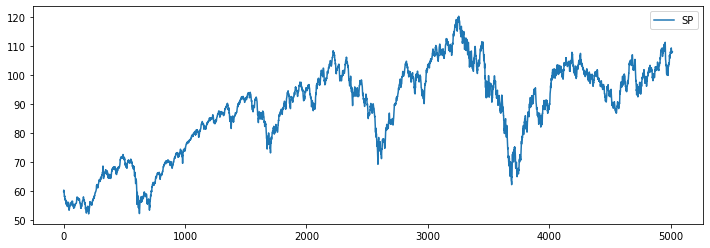

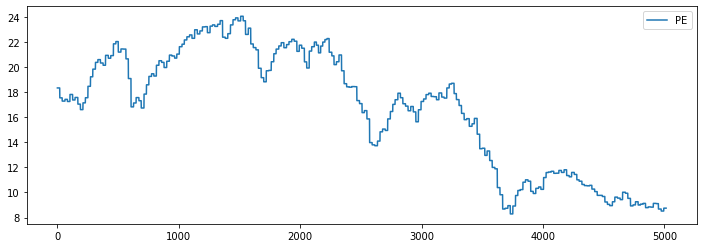

In [37]:
plt.figure(figsize=(12, 4))
plt.plot(np.arange(len(sp_train)), sp_train, label='SP')
plt.legend()
plt.figure(figsize=(12, 4))
plt.plot(np.arange(len(pe_train)), pe_train, label='PE')
plt.legend()
plt.show()

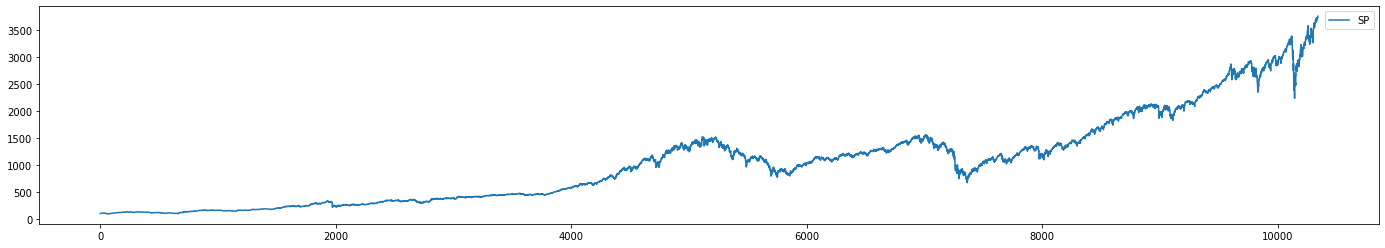

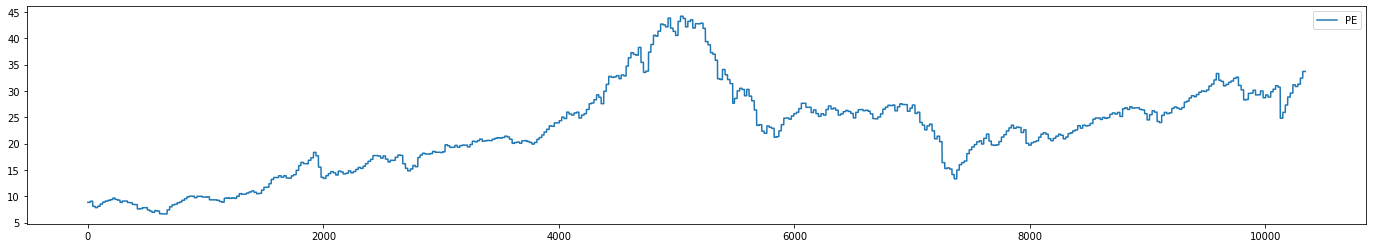

In [38]:
plt.figure(figsize=(24, 4))
plt.plot(np.arange(len(sp_test)), sp_test, label='SP')
plt.legend()
plt.figure(figsize=(24, 4))
plt.plot(np.arange(len(pe_test)), pe_test, label='PE')
plt.legend()
plt.show()

**according to the requirement, we need to test on the data after 1980, however, most of the data is after 1980, which means we may not have enough data to train the model. <br> Further more, the pattern of sp before and after 1980 are not very similar, which bring more difficalty to our training process**

# correlation-based algorithm: 
correlate when Schiller is high and S&P500 is also very high <br>
my algo works like a predictor of when to sell ????

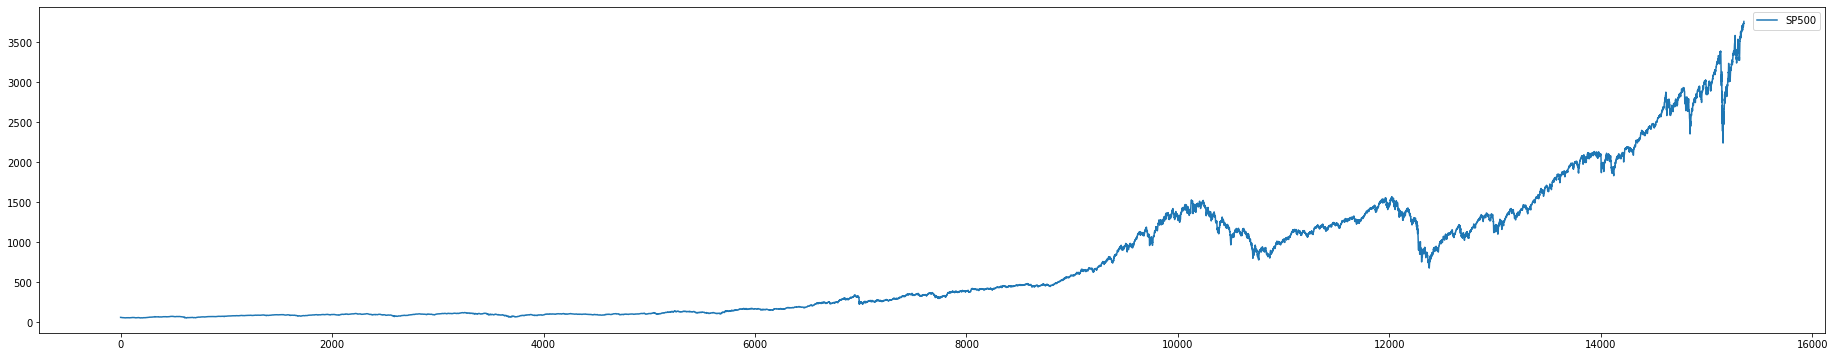

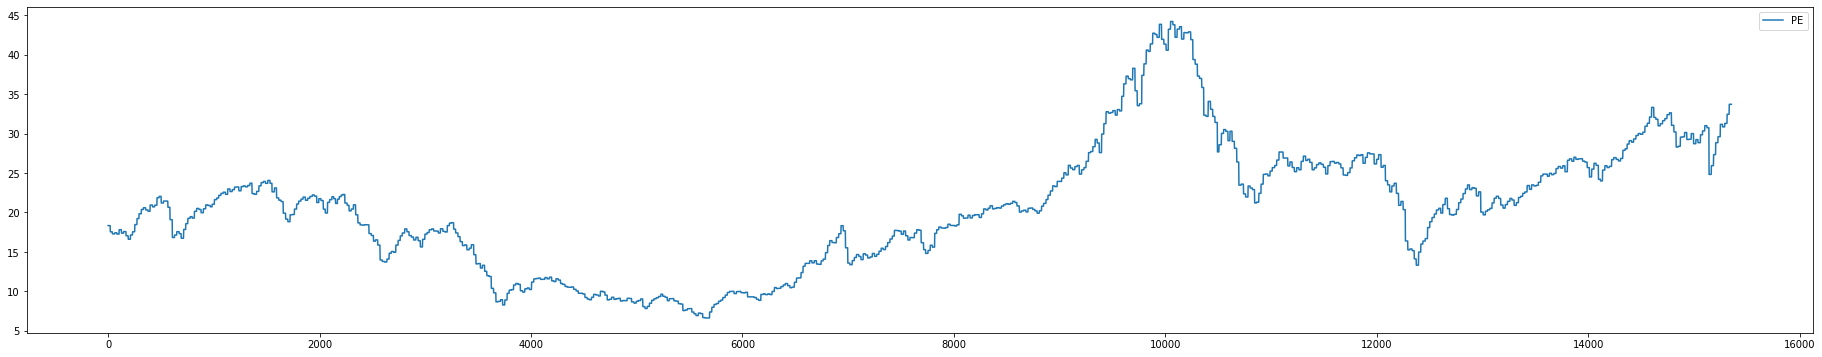

In [39]:
plt.figure(figsize=(32, 6))

plt.plot(np.arange(len(sp)), sp, label='SP500')
plt.legend()
plt.figure(figsize=(32, 6))
plt.plot(np.arange(len(pe)), pe, label='PE')
plt.legend()
plt.show()


# multiply PE value by 30, to be clearer

In [40]:
def cor(s1, s2):
    
    m1 = np.mean(s1)
    m2 = np.mean(s2)

    # # remove the standard deivation, because PE is too small compared to SP500 value
    std1 = np.std(s1)
    std2 = np.std(s2)

    # print(f"mean1: {m1}, mean2: {m2}, std1: {std1}, std2: {std2}")
    s1_new = s1 - m1
    s2_new = s2 - m2

    s1_new /= std1
    s2_new /= std2
    
    cov = np.sum(s1_new * s2_new)

    dev1 = math.sqrt(np.sum(s1_new * s1_new))
    dev2 = math.sqrt(np.sum(s2_new * s2_new))

    return cov / (dev1*dev2)


In [41]:
pe_arr = np.array(pe)
sp_arr = np.array(sp)

In [48]:
T = 60
correlation = []


for i in range(T, len(df)+1):
    correlation.append(cor(pe_arr[i-T:i], sp_arr[i-T:i]))

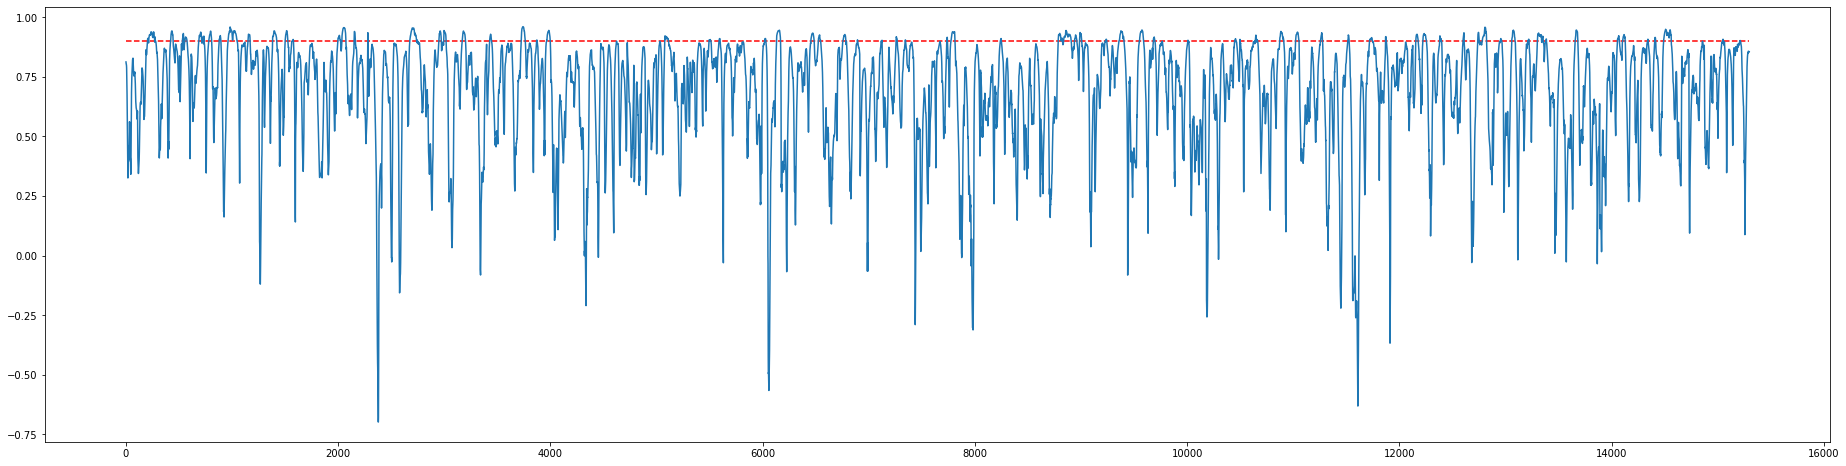

In [50]:
plt.figure(figsize=(32, 8))
plt.plot(np.arange(len(correlation)), correlation)
plt.hlines(y=0.9, xmin=0, xmax=len(correlation), colors='r', linestyles='dashed', )
plt.show()


In [55]:
sum(x_idx)

1866

# design CNN to recognize wave-pattern in dS&P500 data <br>
1. labeled(trainable) or unlabeled(fix the parameters)?<br>
2. fixed length 5

make my own dataset for wave detection, and freeze the CNN's kernel's weights as (-1, 1)

In [39]:
Tx_wave = 5

In [37]:
model_ipt = Input(shape=(Tx_wave, 1))
cnn_layer_opt1 = Conv1D(filters=1, kernel_size=(2, ), strides=1, padding='valid')(model_ipt)
cnn_layer_opt2 = Conv1D(filters=1, kernel_size=(2, ), strides=1, padding='valid')(cnn_layer_opt1)
reshape_layer_opt = Reshape((-1, ))(cnn_layer_opt2)
dense_layer_opt = Dense(6, activation='relu')(reshape_layer_opt)
model_opt = Dense(2, activation='softmax')(dense_layer_opt)
wave_detect_model =Model(model_ipt, model_opt)

In [38]:
wave_detect_model.summary(line_length=200)

Model: "model"
________________________________________________________________________________________________________________________________________________________________________________________________________
Layer (type)                                                                              Output Shape                                                                    Param #                       
input_1 (InputLayer)                                                                      [(None, 5, 1)]                                                                  0                             
________________________________________________________________________________________________________________________________________________________________________________________________________
conv1d (Conv1D)                                                                           (None, 4, 1)                                                                    3          

## Make dataset

In [40]:
data_X_CNN = []
data_Y_CNN = []

In [41]:
for i in range(Tx_wave, len(sp)):
    data_X_CNN.append(sp[i-Tx_wave:i])

    # detect summit and valley in this range
    idx_summit = []
    idx_valley = []
    # if it is a wave pattern, there will be two summits and only one valley
    for j in range(i-Tx_wave+1, i-1):
        if sp[j-1] < sp[j] > sp[j+1]:
            idx_summit.append(j)
        
        if sp[j-1] > sp[j] < sp[j+1]:
            idx_valley.append(j)

    #  and 0.7<(sp[idx_summit[1]] - sp[idx_valley[0]]) / (sp[idx_summit[0]] - sp[i-Tx_wave]) < 1.43
    if len(idx_summit) == 2 and len(idx_valley) == 1 and sp[idx_summit[1]] > sp[idx_summit[0]]:
        data_Y_CNN.append(1)
        # fig = plt.figure(figsize=(6, 3))
        # plt.plot(np.arange(Tx_wave), sp[i-Tx_wave:i])
        # plt.show()
    else:
        data_Y_CNN.append(0)




In [42]:
sum(data_Y_CNN)
# for the CNN, it seems to be an unbalanced dataset

409

In [43]:
data_X_CNN_arr = np.array(data_X_CNN)
data_X_CNN_arr.shape

(15350, 5)

In [44]:
data_Y_CNN_arr = np.array(data_Y_CNN)
data_Y_CNN_arr.shape

(15350,)

In [45]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(data_X_CNN_arr, data_Y_CNN_arr)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [46]:
X_resampled.shape, y_resampled.shape

((29882, 5), (29882,))

In [47]:
X_resampled = np.expand_dims(X_resampled, -1)

In [ ]:
wave_detect_model.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

## train wave detection model

In [ ]:
history = wave_detect_model.fit(X_resampled, y_resampled, epochs=200, batch_size=16, verbose=1)

Epoch 1/200
1868/1868 [==============================] - 4s 2ms/step - loss: 1.9584 - accuracy: 0.7463
Epoch 2/200
1868/1868 [==============================] - 4s 2ms/step - loss: 0.4314 - accuracy: 0.8212
Epoch 3/200
1868/1868 [==============================] - 4s 2ms/step - loss: 0.3992 - accuracy: 0.8247
Epoch 4/200
1868/1868 [==============================] - 4s 2ms/step - loss: 0.3866 - accuracy: 0.8319
Epoch 5/200
1868/1868 [==============================] - 4s 2ms/step - loss: 0.3785 - accuracy: 0.8382
Epoch 6/200
1868/1868 [==============================] - 4s 2ms/step - loss: 0.3568 - accuracy: 0.8474
Epoch 7/200
1868/1868 [==============================] - 4s 2ms/step - loss: 0.3485 - accuracy: 0.8534
Epoch 8/200
1868/1868 [==============================] - 4s 2ms/step - loss: 0.3186 - accuracy: 0.8663
Epoch 9/200
1868/1868 [==============================] - 4s 2ms/step - loss: 0.3142 - accuracy: 0.8689
Epoch 10/200
1868/1868 [==============================] - 4s 2ms/step - l

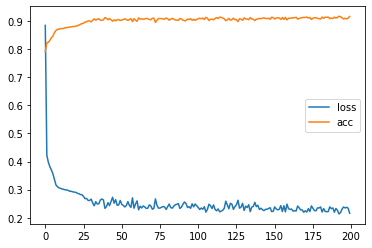

In [ ]:
loss = history.history['loss']
acc = history.history['accuracy']

plt.plot(np.arange(len(loss)), loss, label='loss')
plt.plot(np.arange(len(acc)), acc, label='acc')
plt.legend()
plt.show()

In [ ]:
wave_detect_model.save_weights('/content/drive/MyDrive/NN_assignment4/wave_detect_model_weights_renew.h5')

## load trained wave detection model weights

In [ ]:
wave_detect_model.load_weights('/content/drive/MyDrive/NN_assignment4/wave_detect_model_weights_renew.h5')

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
y_pred = wave_detect_model.predict(data_X_CNN_arr)
y_pred = np.argmax(y_pred, axis=-1)
y_pred.shape
recall_score(data_Y_CNN_arr, y_pred), accuracy_score(data_Y_CNN_arr, y_pred)

(0.9779951100244498, 0.8328990228013029)

## better wave detection

In [50]:
model_ipt = Input(shape=(Tx_wave, 1))
cnn_layer_opt = Conv1D(filters=1, kernel_size=(2, ), strides=1, padding='valid',activation='relu', kernel_initializer=tf.keras.initializers.Constant(
    value=np.array([[[-1]], [[1]]])
), name='freeze')(model_ipt)
reshape_layer_opt = Reshape((-1, ))(cnn_layer_opt)
cut_layer_opt = Lambda(lambda x: tf.math.minimum(x, 0.1))(reshape_layer_opt)
model_opt = Dense(2, activation='softmax')(cut_layer_opt)
wave_detect_model_new =Model(model_ipt, model_opt)

In [51]:
wave_detect_model_new.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
freeze (Conv1D)              (None, 4, 1)              3         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4)                 0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [52]:
wave_detect_model_new.get_layer('freeze').trainable=False

In [53]:
wave_detect_model_new.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history_new = wave_detect_model_new.fit(X_resampled, y_resampled, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
1868/1868 [==============================] - 4s 2ms/step - loss: 0.6397 - accuracy: 0.8499
Epoch 2/50
1868/1868 [==============================] - 3s 2ms/step - loss: 0.5184 - accuracy: 0.8832
Epoch 3/50
1868/1868 [==============================] - 3s 2ms/step - loss: 0.4279 - accuracy: 0.9157
Epoch 4/50
1868/1868 [==============================] - 3s 2ms/step - loss: 0.3638 - accuracy: 0.9288
Epoch 5/50
1868/1868 [==============================] - 3s 2ms/step - loss: 0.3125 - accuracy: 0.9296
Epoch 6/50
1868/1868 [==============================] - 3s 2ms/step - loss: 0.2759 - accuracy: 0.9306
Epoch 7/50
1868/1868 [==============================] - 3s 2ms/step - loss: 0.2438 - accuracy: 0.9329
Epoch 8/50
1868/1868 [==============================] - 3s 2ms/step - loss: 0.2178 - accuracy: 0.9450
Epoch 9/50
1868/1868 [==============================] - 3s 2ms/step - loss: 0.2002 - accuracy: 0.9514
Epoch 10/50
1868/1868 [==============================] - 3s 2ms/step - loss: 0.184

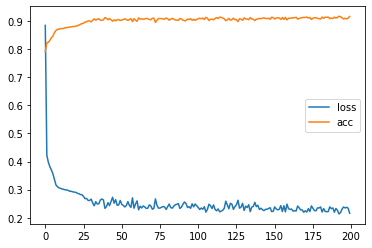

In [ ]:
loss = history.history['loss']
acc = history.history['accuracy']

plt.plot(np.arange(len(loss)), loss, label='loss')
plt.plot(np.arange(len(acc)), acc, label='acc')
plt.legend()
plt.show()

In [ ]:
wave_detect_model_new.save_weights('/content/drive/MyDrive/NN_assignment4/wave_detect_model_weights_renew_new.h5')

In [54]:
wave_detect_model_new.load_weights('/content/drive/MyDrive/NN_assignment4/wave_detect_model_weights_renew_new.h5')

In [56]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [57]:
y_pred = wave_detect_model_new.predict(data_X_CNN_arr)
y_pred = np.argmax(y_pred, axis=-1)
y_pred.shape
recall_score(data_Y_CNN_arr, y_pred), accuracy_score(data_Y_CNN_arr, y_pred), precision_score(data_Y_CNN_arr, y_pred)

(0.9902200488997555, 0.9740065146579805, 0.50625)

recall score and acc score are high enough, and precision score is a little bit lower, but it doesn,t matter, beacuse there are so less pos samples.

# Old Version

## RNN use CNN's prediction's to do further prediction: <br>
1. next value (S&P500)
2. correct sell signal (I assume the sell signal won't be helpful while predicting the 'next value')



### define model

In [60]:
Tx = 180
# there are 180 sp values in a series, according to this , we will predict the next value.
# the wave detector is detecting the wave whose length is 5

In [61]:
rnn_ipt = Input(shape=(Tx, 1))
wave_detect_ipt = Input(shape=(Tx-4, 5, 1))

wave_detect_opt = TimeDistributed(wave_detect_model_new)(wave_detect_ipt)
lstm_opt1 = LSTM(8, return_sequences=False)(rnn_ipt)
lstm_opt2 = LSTM(32, return_sequences=False)(wave_detect_opt)

concat_opt = Concatenate(axis=-1)([lstm_opt1, lstm_opt2])
opt = Dense(1)(concat_opt)

final_model = Model([rnn_ipt, wave_detect_ipt], opt)

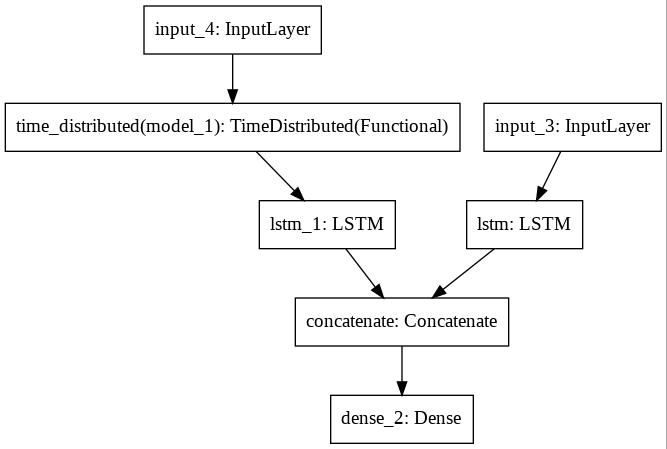

In [62]:
tf.keras.utils.plot_model(final_model, '/content/drive/MyDrive/NN_assignment4/final_model.jpg')

In [63]:
final_model.summary(150)

Model: "model_2"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
input_4 (InputLayer)                             [(None, 176, 5, 1)]              0                                                                   
______________________________________________________________________________________________________________________________________________________
input_3 (InputLayer)                             [(None, 180, 1)]                 0                                                                   
______________________________________________________________________________________________________________________________________________________
time_distributed (TimeDistributed)               (None, 176, 2)              

In [64]:
def myloss(y_true, y_pred):
    return tf.abs(y_true-y_pred) / y_true

In [65]:
final_model.compile(loss='mae', optimizer='adam')

In [66]:
wave_detect_model_new.trainable=False

### make dataset

In [67]:
data_x_rnn = []
data_x_wave = []
data_y = []

for i in range(Tx, len(sp)):
    data_x_rnn.append(sp[i-Tx:i])
    data_y.append(sp[i])
    temp_wave = []
    for j in range(i-Tx+5, i+1):
        temp_wave.append(sp[j-5:j])
    data_x_wave.append(temp_wave)

In [68]:
data_x_rnn_arr = np.array(data_x_rnn)
data_x_wave_arr = np.expand_dims(np.array(data_x_wave), -1)
data_y_arr = np.array(data_y)

In [69]:
data_x_rnn_arr.shape, data_x_wave_arr.shape, data_y_arr.shape

((15175, 180), (15175, 176, 5, 1), (15175,))

In [70]:
train_split = 0.9

In [71]:
train_x_rnn_arr = data_x_rnn_arr[:int(train_split*len(data_x_rnn_arr))]
test_x_rnn_arr = data_x_rnn_arr[int(train_split*len(data_x_rnn_arr)):]

In [72]:
train_x_wave_arr = data_x_wave_arr[:int(train_split*len(data_x_wave_arr))]
test_x_wave_arr = data_x_wave_arr[int(train_split*len(data_x_wave_arr)):]

In [73]:
train_y_arr = data_y_arr[:int(train_split*len(data_y_arr))]
test_y_arr = data_y_arr[int(train_split*len(data_y_arr)):]

### train model on train set for 1000 epochs
not converged, need to train for more epochs

In [ ]:
history = final_model.fit([train_x_rnn_arr, train_x_wave_arr], train_y_arr, batch_size=16, epochs=1000, verbose=1, validation_data=([test_x_rnn_arr, test_x_wave_arr], test_y_arr))

Epoch 1/1000
854/854 [==============================] - 13s 13ms/step - loss: 521.0308 - val_loss: 2537.7090
Epoch 2/1000
854/854 [==============================] - 11s 12ms/step - loss: 496.7311 - val_loss: 2507.2256
Epoch 3/1000
854/854 [==============================] - 10s 12ms/step - loss: 467.8352 - val_loss: 2481.6150
Epoch 4/1000
854/854 [==============================] - 11s 12ms/step - loss: 448.5438 - val_loss: 2461.8015
Epoch 5/1000
854/854 [==============================] - 10s 12ms/step - loss: 439.8148 - val_loss: 2445.6951
Epoch 6/1000
854/854 [==============================] - 10s 12ms/step - loss: 431.1683 - val_loss: 2429.8601
Epoch 7/1000
854/854 [==============================] - 10s 12ms/step - loss: 425.1447 - val_loss: 2414.0352
Epoch 8/1000
854/854 [==============================] - 10s 12ms/step - loss: 423.6961 - val_loss: 2399.9829
Epoch 9/1000
854/854 [==============================] - 10s 12ms/step - loss: 415.0818 - val_loss: 2385.7036
Epoch 10/1000
854/8

In [ ]:
final_model.save_weights('/content/drive/MyDrive/NN_assignment4/final_model_renew_weights_1000epochs.h5')

### load final model weights

In [122]:
final_model.load_weights("/content/drive/MyDrive/NN_assignment4/final_model_renew_weights_1000epochs.h5")

### continue training process

In [123]:
# trying to use a larger lr, larger batch_size to accelerate 
final_model.compile(tf.keras.optimizers.Adam(learning_rate=0.005), loss='mae')
for i in range(10):
    final_model.fit([train_x_rnn_arr, train_x_wave_arr], train_y_arr, batch_size=32, epochs=50, verbose=1, validation_data=([test_x_rnn_arr, test_x_wave_arr], test_y_arr))
    final_model.save_weights(f'/content/drive/MyDrive/NN_assignment4/final_model_renew_weights_{1000+i*50}epochs.h5')

Epoch 1/50
427/427 [==============================] - 9s 15ms/step - loss: 26.4648 - val_loss: 1080.2784
Epoch 2/50
427/427 [==============================] - 6s 14ms/step - loss: 29.9682 - val_loss: 1325.8895
Epoch 3/50
427/427 [==============================] - 6s 14ms/step - loss: 44.9319 - val_loss: 1316.8527
Epoch 4/50
427/427 [==============================] - 6s 14ms/step - loss: 41.2105 - val_loss: 1310.7336
Epoch 5/50
427/427 [==============================] - 6s 14ms/step - loss: 42.0097 - val_loss: 1306.9924
Epoch 6/50
427/427 [==============================] - 6s 14ms/step - loss: 44.7775 - val_loss: 1303.3995
Epoch 7/50
427/427 [==============================] - 6s 14ms/step - loss: 43.7907 - val_loss: 1300.6700
Epoch 8/50
427/427 [==============================] - 6s 14ms/step - loss: 40.0089 - val_loss: 1297.6532
Epoch 9/50
427/427 [==============================] - 6s 14ms/step - loss: 42.5429 - val_loss: 1295.6179
Epoch 10/50
427/427 [==============================] - 

KeyboardInterrupt: ignored

### test model by predict the next value
1. predict the next 1 2 3 4 datapoints from Jan 1 1980 through the present day;

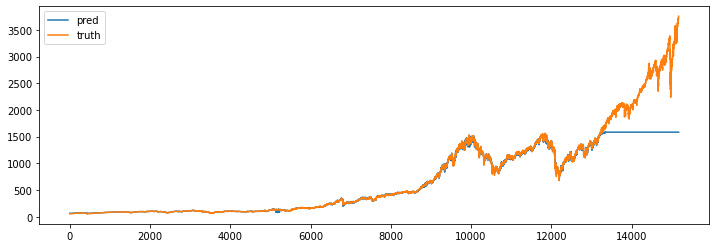

In [115]:
# pred the next value
y_pred = final_model.predict([data_x_rnn_arr, data_x_wave_arr])
figure = plt.figure(figsize=(12, 4))
plt.plot(np.arange(len(y_pred)), y_pred, label='pred')
plt.plot(np.arange(len(y_pred)), data_y_arr, label='truth')
plt.legend()
plt.show()

## Optimization0



In [89]:
rnn_ipt = Input(shape=(Tx-4, 1))

wave_detect_ipt = Input(shape=(Tx-4, 5, 1))
wave_detect_opt = TimeDistributed(wave_detect_model_new)(wave_detect_ipt)

concat_opt = Concatenate(axis=-1)([rnn_ipt, wave_detect_opt])

lstm_opt = LSTM(8, return_sequences=False)(concat_opt)

opt = Dense(1)(lstm_opt)

optimized_model_0 = Model([rnn_ipt, wave_detect_ipt], opt)

In [90]:
optimized_model_0.summary(line_length=150)

Model: "model_4"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
input_10 (InputLayer)                            [(None, 176, 5, 1)]              0                                                                   
______________________________________________________________________________________________________________________________________________________
input_9 (InputLayer)                             [(None, 176, 1)]                 0                                                                   
______________________________________________________________________________________________________________________________________________________
time_distributed_3 (TimeDistributed)             (None, 176, 2)              

In [91]:
train_x_rnn_sp_arr = train_x_rnn_arr[:, 4:]
train_x_rnn_sp_arr.shape

(13657, 176)

In [92]:
test_x_rnn_sp_arr = test_x_rnn_arr[:, 4:]
test_x_rnn_sp_arr.shape

(1518, 176)

In [93]:
optimized_model_0.compile('adam', loss='mae')

In [94]:
history_optimized_0 = optimized_model_0.fit([train_x_rnn_sp_arr, train_x_wave_arr], train_y_arr, batch_size=64, epochs=1000, verbose=1, validation_data=([test_x_rnn_sp_arr, test_x_wave_arr], test_y_arr))

Epoch 1/1000
214/214 [==============================] - 3s 10ms/step - loss: 538.9481 - val_loss: 2575.9299
Epoch 2/1000
214/214 [==============================] - 2s 8ms/step - loss: 541.9959 - val_loss: 2574.7893
Epoch 3/1000
214/214 [==============================] - 2s 8ms/step - loss: 533.0848 - val_loss: 2573.6868
Epoch 4/1000
214/214 [==============================] - 2s 8ms/step - loss: 536.8924 - val_loss: 2572.5977
Epoch 5/1000
214/214 [==============================] - 2s 8ms/step - loss: 542.2343 - val_loss: 2571.5144
Epoch 6/1000
214/214 [==============================] - 2s 8ms/step - loss: 534.5842 - val_loss: 2570.4353
Epoch 7/1000
214/214 [==============================] - 2s 8ms/step - loss: 536.2861 - val_loss: 2569.3582
Epoch 8/1000
214/214 [==============================] - 2s 8ms/step - loss: 529.7677 - val_loss: 2568.2832
Epoch 9/1000
214/214 [==============================] - 2s 8ms/step - loss: 528.5319 - val_loss: 2567.2087
Epoch 10/1000
214/214 [=============

In [98]:
optimized_model_0.save_weights('/content/drive/MyDrive/NN_assignment4/optimized_model_0_1000epochs.h5')

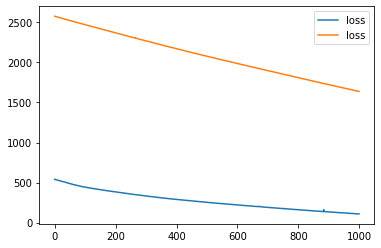

In [97]:
loss = history_optimized_0.history['loss']
val_loss = history_optimized_0.history['val_loss']
plt.plot(np.arange(len(loss)), loss, label='loss')
plt.plot(np.arange(len(loss)), val_loss, label='loss')
plt.legend()
plt.show()

In [99]:
history_optimized_0_1 = optimized_model_0.fit([train_x_rnn_sp_arr, train_x_wave_arr], train_y_arr, batch_size=64, epochs=4000, verbose=1, validation_data=([test_x_rnn_sp_arr, test_x_wave_arr], test_y_arr))

Streaming output truncated to the last 5000 lines.
Epoch 1501/4000
214/214 [==============================] - 2s 8ms/step - loss: 21.5947 - val_loss: 1157.2290
Epoch 1502/4000
214/214 [==============================] - 2s 8ms/step - loss: 21.6169 - val_loss: 1156.9802
Epoch 1503/4000
214/214 [==============================] - 2s 8ms/step - loss: 21.8632 - val_loss: 1156.7516
Epoch 1504/4000
214/214 [==============================] - 2s 8ms/step - loss: 21.4533 - val_loss: 1156.5009
Epoch 1505/4000
214/214 [==============================] - 2s 8ms/step - loss: 21.6881 - val_loss: 1156.2648
Epoch 1506/4000
214/214 [==============================] - 2s 8ms/step - loss: 21.6367 - val_loss: 1156.0276
Epoch 1507/4000
214/214 [==============================] - 2s 8ms/step - loss: 21.4741 - val_loss: 1155.7854
Epoch 1508/4000
214/214 [==============================] - 2s 8ms/step - loss: 21.6749 - val_loss: 1155.5460
Epoch 1509/4000
214/214 [==============================] - 2s 8ms/step - loss

In [100]:
optimized_model_0.save_weights('/content/drive/MyDrive/NN_assignment4/optimized_model_0_5000epochs.h5')

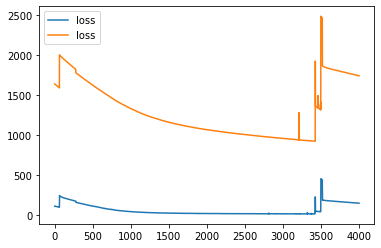

In [101]:
loss = history_optimized_0_1.history['loss']
val_loss = history_optimized_0_1.history['val_loss']
plt.plot(np.arange(len(loss)), loss, label='loss')
plt.plot(np.arange(len(loss)), val_loss, label='loss')
plt.legend()
plt.show()
# can't know why both the train loss and the val loss increase suddenly at that point...

In [ ]:
optimized_model_0.compile(tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae')

## Optimization 1: using selu in lstm instead of the default 'tanh'



In [102]:
rnn_ipt = Input(shape=(Tx-4, 1))

wave_detect_ipt = Input(shape=(Tx-4, 5, 1))
wave_detect_opt = TimeDistributed(wave_detect_model_new)(wave_detect_ipt)

concat_opt = Concatenate(axis=-1)([rnn_ipt, wave_detect_opt])

lstm_opt = LSTM(4, return_sequences=False, activation='selu')(concat_opt)

opt = Dense(1)(lstm_opt)

optimized_model_1 = Model([rnn_ipt, wave_detect_ipt], opt)

In [103]:
optimized_model_1.summary(line_length=150)

Model: "model_5"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
input_12 (InputLayer)                            [(None, 176, 5, 1)]              0                                                                   
______________________________________________________________________________________________________________________________________________________
input_11 (InputLayer)                            [(None, 176, 1)]                 0                                                                   
______________________________________________________________________________________________________________________________________________________
time_distributed_4 (TimeDistributed)             (None, 176, 2)              

In [104]:
train_x_rnn_sp_arr = train_x_rnn_arr[:, 4:]
train_x_rnn_sp_arr.shape

(13657, 176)

In [105]:
test_x_rnn_sp_arr = test_x_rnn_arr[:, 4:]
test_x_rnn_sp_arr.shape

(1518, 176)

In [110]:
optimized_model_1.compile(tf.keras.optimizers.Adam(learning_rate=0.01), loss='mae')

In [111]:
history_optimized_1 = optimized_model_1.fit([train_x_rnn_sp_arr, train_x_wave_arr], train_y_arr, batch_size=128, epochs=500, verbose=1, validation_data=([test_x_rnn_sp_arr, test_x_wave_arr], test_y_arr))

Epoch 1/500
107/107 [==============================] - 21s 189ms/step - loss: 512.8729 - val_loss: 2543.2615
Epoch 2/500
107/107 [==============================] - 20s 191ms/step - loss: 501.3029 - val_loss: 2540.3103
Epoch 3/500
107/107 [==============================] - 20s 191ms/step - loss: 501.7436 - val_loss: 2537.3591
Epoch 4/500
107/107 [==============================] - 20s 191ms/step - loss: 500.3090 - val_loss: 2534.4077
Epoch 5/500
107/107 [==============================] - 20s 188ms/step - loss: 498.6216 - val_loss: 2531.4565
Epoch 6/500
107/107 [==============================] - 21s 192ms/step - loss: 491.5925 - val_loss: 2528.5054
Epoch 7/500
107/107 [==============================] - 21s 193ms/step - loss: 493.4535 - val_loss: 2525.5542
Epoch 8/500
107/107 [==============================] - 21s 192ms/step - loss: 490.2791 - val_loss: 2522.6135
Epoch 9/500
107/107 [==============================] - 20s 190ms/step - loss: 483.9149 - val_loss: 2519.7075
Epoch 10/500
107/10

KeyboardInterrupt: ignored

In [113]:
optimized_model_1.save_weights('/content/drive/MyDrive/NN_assignment4/optimized_model_1_50epochs.h5')

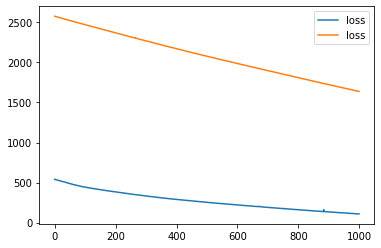

In [ ]:
loss = history_optimized_1.history['loss']
val_loss = history_optimized_1.history['val_loss']
plt.plot(np.arange(len(loss)), loss, label='loss')
plt.plot(np.arange(len(loss)), val_loss, label='loss')
plt.legend()
plt.show()

## Optimization
1. add PE value to the prediction
2. use a longer time period to train the model. <br>
try method 1 for the moment

### define model

In [ ]:
rnn_sp_ipt = Input(shape=(Tx, 1))
rnn_pe_ipt = Input(shape=(Tx, 1))
wave_detect_ipt = Input(shape=(Tx-4, 5, 1))

concat_ipt = Concatenate(axis=-1)([rnn_sp_ipt, rnn_pe_ipt]) 
lstm_opt1 = LSTM(8, return_sequences=False)(concat_ipt)

wave_detect_opt = TimeDistributed(wave_detect_model_new)(wave_detect_ipt)
lstm_opt2 = LSTM(32, return_sequences=False)(wave_detect_opt)

concat_opt = Concatenate(axis=-1)([lstm_opt1, lstm_opt2])
opt = Dense(1)(concat_opt)

optimized_model = Model([rnn_sp_ipt, rnn_pe_ipt, wave_detect_ipt], opt)

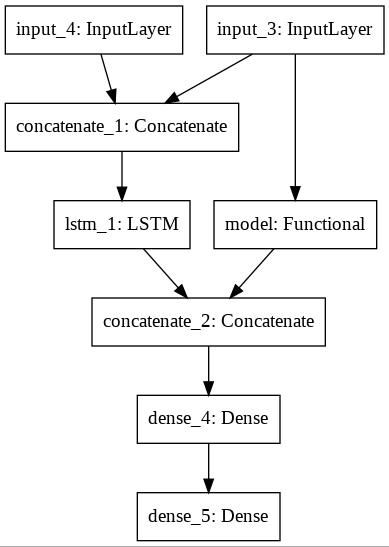

In [ ]:
tf.keras.utils.plot_model(optimized_model, '/content/drive/MyDrive/NN_assignment4/optimized_model_renew.jpg')

In [ ]:
optimized_model.summary(150)

Model: "model_2"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
input_3 (InputLayer)                             [(None, 10, 1)]                  0                                                                   
______________________________________________________________________________________________________________________________________________________
input_4 (InputLayer)                             [(None, 10, 1)]                  0                                                                   
______________________________________________________________________________________________________________________________________________________
concatenate_1 (Concatenate)                      (None, 10, 2)               

In [ ]:
optimized_model.compile(loss='mae', optimizer='adam')
wave_detect_model_new.trainable=False

### make pe dataset

In [ ]:
train_x_rnn_sp_arr = train_x_rnn_arr
test_x_rnn_sp_arr = test_x_rnn_arr

In [ ]:
data_x_rnn_pe = []

for i in range(Tx, len(sp)):
    data_x_rnn.append(pe[i-Tx:i])
    
data_x_rnn_pe_arr = np.array(data_x_rnn_pe)

(723, 10, 1)

In [ ]:
train_x_rnn_pe_arr = train_x_rnn_pe_arr[:int(train_split*len(pe_data_arr))]

In [ ]:
test_x_rnn_pe_arr = test_x_rnn_pe_arr[int(train_split*len(pe_data_arr)):]

In [ ]:
sp_train_arr.shape, pe_train_arr.shape, sp_test_arr.shape, pe_test_arr.shape, y_truth_train.shape, y_truth_test.shape

((650, 10, 1), (650, 10, 1), (73, 10, 1), (73, 10, 1), (650,), (73,))

### train optimized model

In [ ]:
history = optimized_model.fit([train_x_rnn_sp_arr, train_x_rnn_pe_arr, train_x_wave_arr], train_y_arr, batch_size=8, epochs=1000, verbose=1, validation_data=([test_x_rnn_sp_arr, test_x_rnn_pe_arr, test_x_wave_arr], test_y_arr))

Epoch 1/1000
82/82 [==============================] - 2s 9ms/step - loss: 507.6717 - val_loss: 2595.9072
Epoch 2/1000
82/82 [==============================] - 0s 5ms/step - loss: 559.8507 - val_loss: 2593.6697
Epoch 3/1000
82/82 [==============================] - 0s 5ms/step - loss: 543.2057 - val_loss: 2592.1484
Epoch 4/1000
82/82 [==============================] - 0s 6ms/step - loss: 534.8044 - val_loss: 2589.5503
Epoch 5/1000
82/82 [==============================] - 0s 5ms/step - loss: 514.6745 - val_loss: 2586.8660
Epoch 6/1000
82/82 [==============================] - 0s 6ms/step - loss: 526.2141 - val_loss: 2583.6902
Epoch 7/1000
82/82 [==============================] - 0s 6ms/step - loss: 559.3179 - val_loss: 2580.0222
Epoch 8/1000
82/82 [==============================] - 0s 5ms/step - loss: 511.4163 - val_loss: 2575.8801
Epoch 9/1000
82/82 [==============================] - 0s 5ms/step - loss: 541.3446 - val_loss: 2571.2769
Epoch 10/1000
82/82 [==============================] - 

In [ ]:
optimized_model.save_weights('optimized_model_weights.h5')

### load optimized model weights

In [ ]:
optimized_model.load_weights('/content/drive/MyDrive/NN_assignment4/optimized_model_weights.h5')

### test optimized model

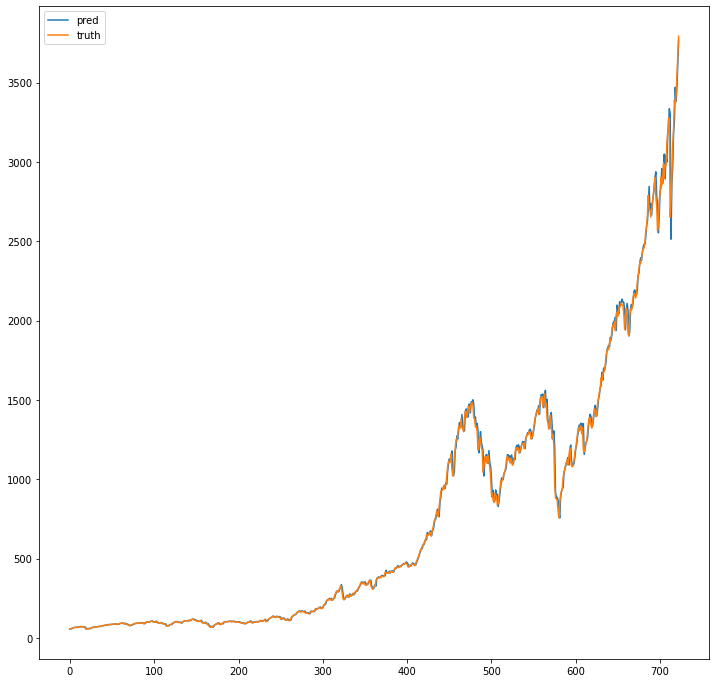

In [ ]:
# pred the next value
y_pred = optimized_model.predict([sp_data_arr, pe_data_arr])
_ = plt.figure(figsize=(12, 12))
plt.plot(np.arange(len(y_pred)), y_pred, label='pred')
plt.plot(np.arange(len(y_pred)), y_truth, label='truth')
plt.legend()
plt.show()

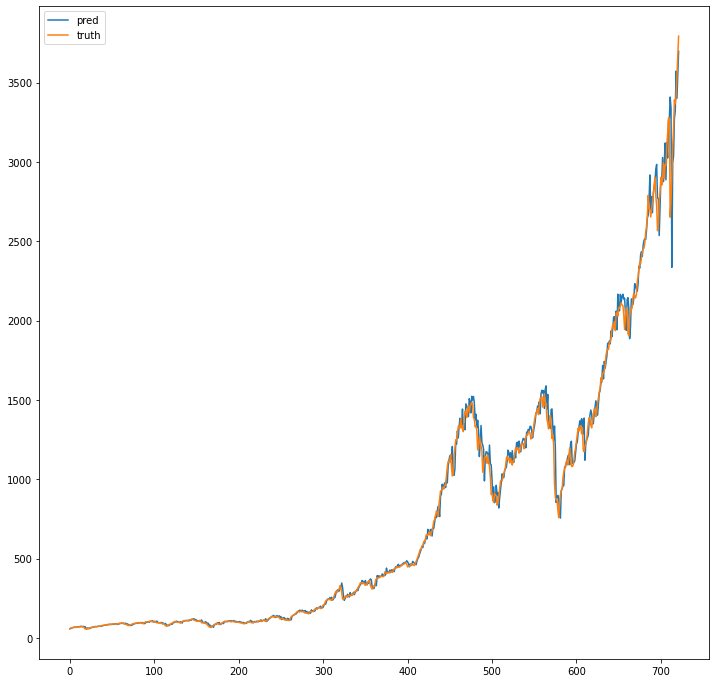

In [ ]:
# pred the next two values using the predicted value
sp_data_sec = []
for i in range(len(sp_data_arr)-1):
    arr = sp_data_arr[i].reshape(-1, )
    sp_data_sec.append(np.concatenate((arr[0:9], y_pred[i]),axis=-1))

sp_data_sec_arr = np.expand_dims(np.array(sp_data_sec), -1)


pe_data_sec_arr = pe_data_arr.copy()[:len(pe_data_arr)-1]
# for i in range(len(pe_data_sec_arr)):
#     pe_data_sec_arr[i] = np.concatenate((pe_data_sec_arr[i][1:].reshape((-1, )), pe_data_sec_arr[i][-1]), axis=-1).reshape((-1, 1))

y_pred_sec = optimized_model.predict([sp_data_sec_arr, pe_data_sec_arr])

# pred the second value
_ = plt.figure(figsize=(12, 12))
plt.plot(np.arange(len(y_pred_sec)), y_pred_sec, label='pred')
plt.plot(np.arange(len(y_pred_sec)), y_truth[1:], label='truth')
plt.legend()
plt.show()

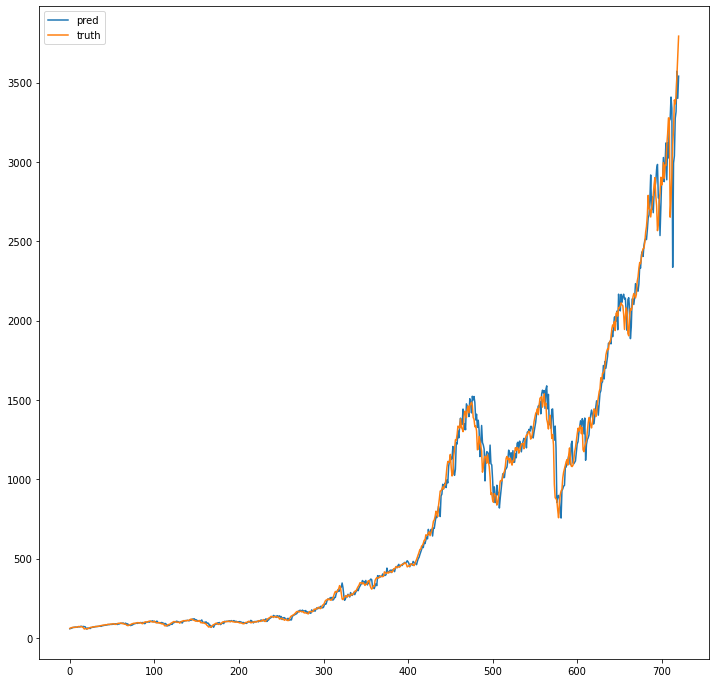

In [ ]:
sp_data_third = []
for i in range(len(sp_data_arr)-2):
    arr = sp_data_arr[i].reshape(-1, )
    sp_data_third.append(np.concatenate((arr[0:9], y_pred[i]),axis=-1))

sp_data_third_arr = np.expand_dims(np.array(sp_data_third), -1)

# make pe dataset
pe_data_third_arr = pe_data_sec_arr.copy()[:len(pe_data_sec_arr)-1]
# for i in range(len(pe_data_third_arr)):
#     pe_data_third_arr[i] = np.concatenate((pe_data_third_arr[i][1:].reshape((-1, )), pe_data_third_arr[i][-1]), axis=-1).reshape((-1, 1))

# pred
y_pred_third = optimized_model.predict([sp_data_third_arr, pe_data_third_arr])

# plot
_ = plt.figure(figsize=(12, 12))
plt.plot(np.arange(len(y_pred_third)), y_pred_third, label='pred')
plt.plot(np.arange(len(y_pred_third)), y_truth[2:], label='truth')
plt.legend()
plt.show()

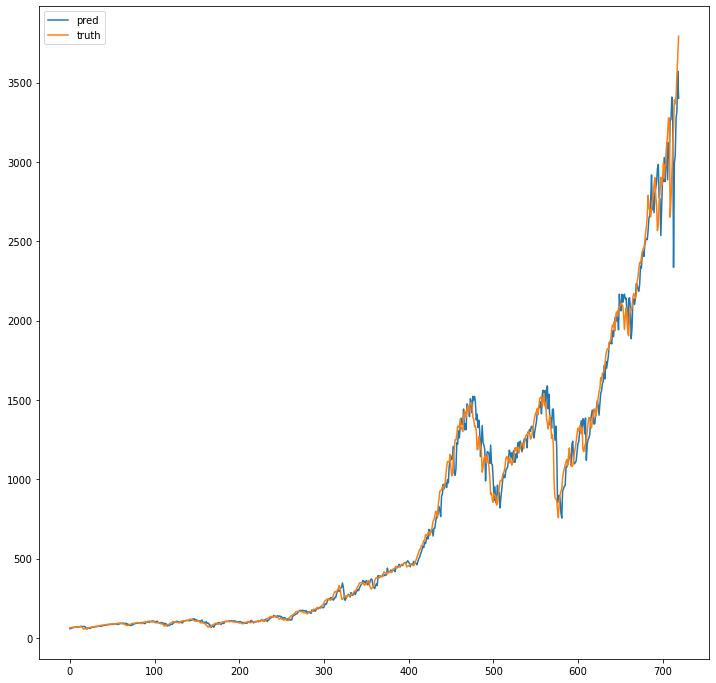

In [ ]:
# make sp dataset
sp_data_fourth = []
for i in range(len(sp_data_arr)-3):
    arr = sp_data_arr[i].reshape(-1, )
    sp_data_fourth.append(np.concatenate((arr[0:9], y_pred[i]),axis=-1))
sp_data_fourth_arr = np.expand_dims(np.array(sp_data_fourth), -1)

# make pe dataset
pe_data_fourth_arr = pe_data_third_arr.copy()[:len(pe_data_third_arr)-1]
# for i in range(len(pe_data_fourth_arr)):
#     pe_data_fourth_arr[i] = np.concatenate((pe_data_fourth_arr[i][1:].reshape((-1, )), pe_data_fourth_arr[i][-1]), axis=-1).reshape((-1, 1))

# pred
y_pred_fourth = optimized_model.predict([sp_data_fourth_arr, pe_data_fourth_arr])

# plot 
_ = plt.figure(figsize=(12, 12))
plt.plot(np.arange(len(y_pred_fourth)), y_pred_fourth, label='pred')
plt.plot(np.arange(len(y_pred_fourth)), y_truth[3:], label='truth')
plt.legend()
plt.show()

In [ ]:
acc1 = []
acc2 = []
acc3 = []
acc4 = []

for i in range(len(y_pred)):
    acc1.append(abs(y_pred[i] - y_truth[i])/ y_truth[i])

for i in range(len(y_pred_sec)):
    acc2.append(abs(y_pred_sec[i] - y_truth[i+1])/ y_truth[i+1])

for i in range(len(y_pred_third)):
    acc3.append(abs(y_pred_third[i] - y_truth[i+2])/ y_truth[i+2])

for i in range(len(y_pred_fourth)):
    acc4.append(abs(y_pred_fourth[i] - y_truth[i+3])/ y_truth[i+3])  

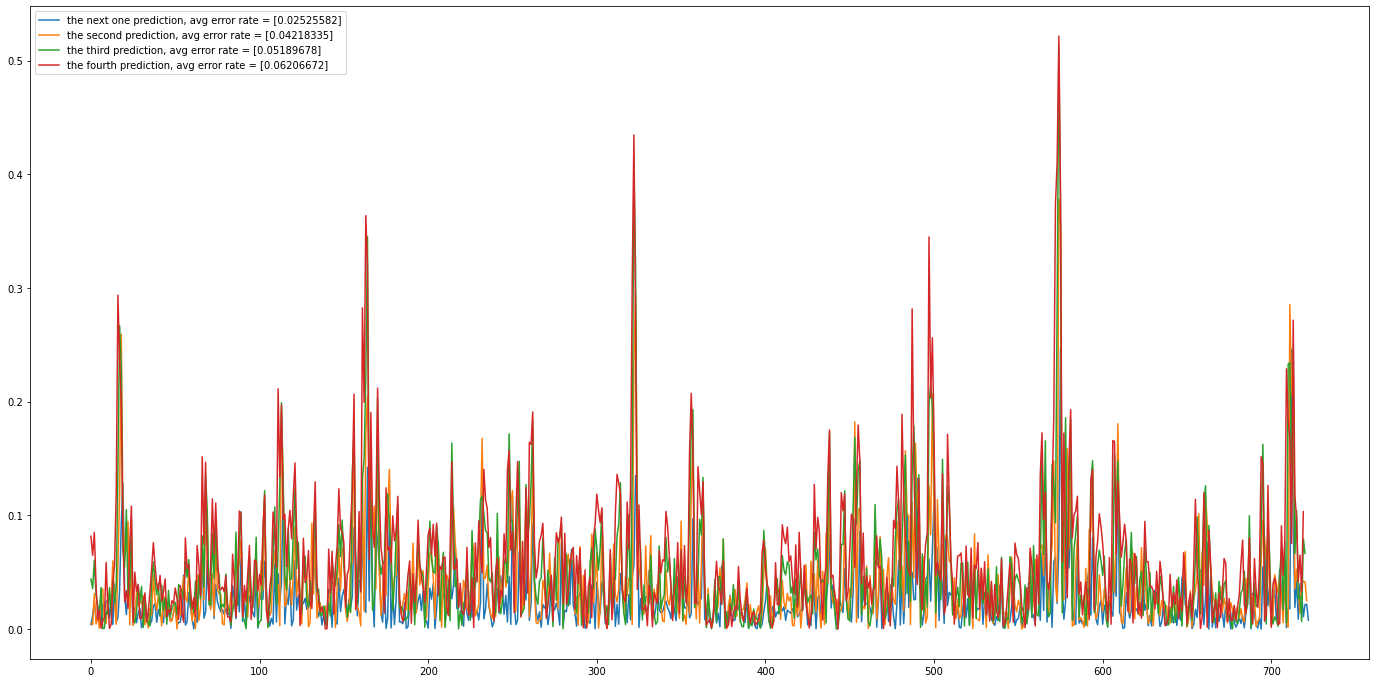

In [ ]:
figure = plt.figure(figsize=(24, 12))
plt.plot(np.arange(len(acc1)), acc1, label=f'the next one prediction, avg error rate = {sum(acc1) / len(acc1)}')
plt.plot(np.arange(len(acc2)), acc2, label=f'the second prediction, avg error rate = {sum(acc2) / len(acc2)}')
plt.plot(np.arange(len(acc3)), acc3, label=f'the third prediction, avg error rate = {sum(acc3) / len(acc3)}')
plt.plot(np.arange(len(acc4)), acc4, label=f'the fourth prediction, avg error rate = {sum(acc4) / len(acc4)}')
plt.legend()
plt.show()

# RNN use CNN's prediction's to do further prediction: <br>
1. next value (S&P500)
2. correct sell signal (I assume the sell signal won't be helpful while predicting the 'next value')



## define model

In [165]:
Tx = 60
# there are 180 sp values in a series, according to this , we will predict the next value.
# the wave detector is detecting the wave whose length is 5

In [188]:
rnn_ipt = Input(shape=(Tx-4, 1))

wave_detect_ipt = Input(shape=(Tx-4, 5, 1))
wave_detect_opt = TimeDistributed(wave_detect_model_new)(wave_detect_ipt)

concat_opt = Concatenate(axis=-1)([rnn_ipt, wave_detect_opt])

lstm_opt = LSTM(8, return_sequences=False)(concat_opt)

opt = Dense(1)(lstm_opt)

model = Model([rnn_ipt, wave_detect_ipt], opt)

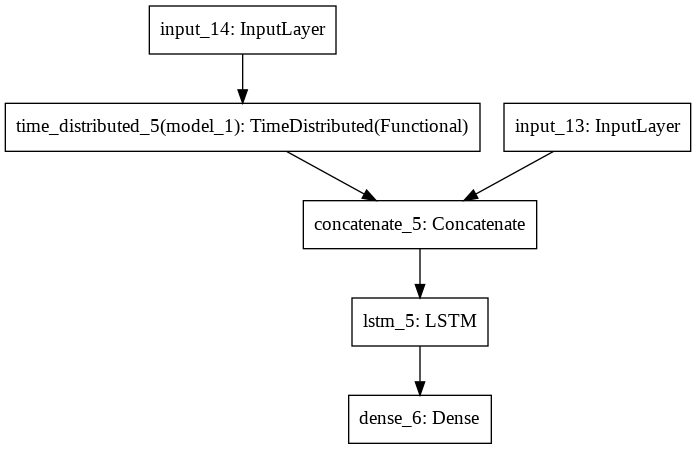

In [168]:
tf.keras.utils.plot_model(model)

In [169]:
model.summary(150)

Model: "model_6"
______________________________________________________________________________________________________________________________________________________
Layer (type)                                     Output Shape                     Param #           Connected to                                      
input_14 (InputLayer)                            [(None, 56, 5, 1)]               0                                                                   
______________________________________________________________________________________________________________________________________________________
input_13 (InputLayer)                            [(None, 56, 1)]                  0                                                                   
______________________________________________________________________________________________________________________________________________________
time_distributed_5 (TimeDistributed)             (None, 56, 2)               

In [170]:
def myloss(y_true, y_pred):
    return tf.abs(y_true-y_pred) / y_true

In [189]:
model.compile(loss='mae', optimizer='adam')

In [190]:
wave_detect_model_new.trainable=False

## make dataset

In [176]:
data_x_rnn = []
data_x_wave = []
data_y = []

for i in range(Tx, len(sp_train)):
    data_x_rnn.append(sp_train[i-Tx+4:i])
    data_y.append(sp_train[i])
    temp_wave = []
    for j in range(i-Tx+5, i+1):
        temp_wave.append(sp_train[j-5:j])
    data_x_wave.append(temp_wave)

In [177]:
data_x_rnn_arr = np.expand_dims(np.array(data_x_rnn), -1)
data_x_wave_arr = np.expand_dims(np.array(data_x_wave), -1)
data_y_arr = np.array(data_y)

In [178]:
data_x_rnn_arr.shape, data_x_wave_arr.shape, data_y_arr.shape

((4955, 56, 1), (4955, 56, 5, 1), (4955,))

## train model on train set for 500 epochs
not converged, need to train for more epochs

In [191]:
history = model.fit([data_x_rnn_arr, data_x_wave_arr], data_y_arr, batch_size=16, epochs=500, verbose=1, validation_split=0.1)

Epoch 1/500
279/279 [==============================] - 3s 5ms/step - loss: 86.2650 - val_loss: 98.0280
Epoch 2/500
279/279 [==============================] - 1s 4ms/step - loss: 85.2755 - val_loss: 97.1824
Epoch 3/500
279/279 [==============================] - 1s 4ms/step - loss: 84.0885 - val_loss: 96.3413
Epoch 4/500
279/279 [==============================] - 1s 4ms/step - loss: 83.5279 - val_loss: 95.5018
Epoch 5/500
279/279 [==============================] - 1s 4ms/step - loss: 82.6226 - val_loss: 94.6631
Epoch 6/500
279/279 [==============================] - 1s 4ms/step - loss: 81.9351 - val_loss: 93.0510
Epoch 7/500
279/279 [==============================] - 1s 4ms/step - loss: 80.1323 - val_loss: 91.5461
Epoch 8/500
279/279 [==============================] - 1s 4ms/step - loss: 79.1489 - val_loss: 90.2772
Epoch 9/500
279/279 [==============================] - 1s 4ms/step - loss: 77.4815 - val_loss: 89.0724
Epoch 10/500
279/279 [==============================] - 1s 4ms/step - los

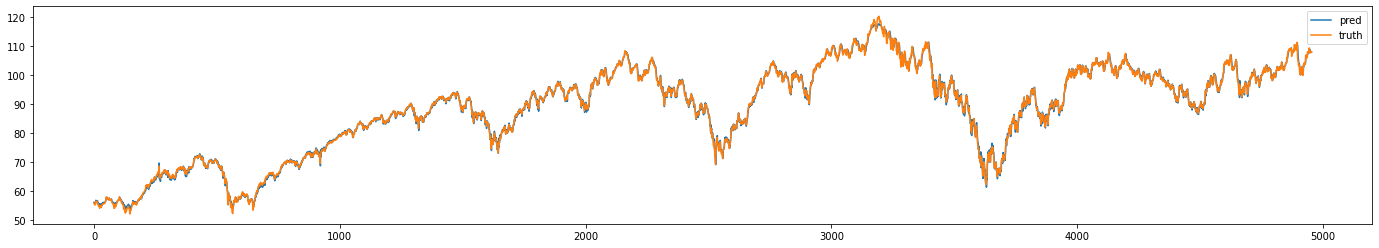

In [194]:
model.save_weights('/content/drive/MyDrive/NN_assignment4/model_weights_500epochs.h5')
# pred the next value
y_pred = model.predict([data_x_rnn_arr, data_x_wave_arr])
figure = plt.figure(figsize=(24, 4))
plt.plot(np.arange(len(y_pred)), y_pred, label='pred')
plt.plot(np.arange(len(y_pred)), data_y_arr, label='truth')
plt.legend()
plt.show()

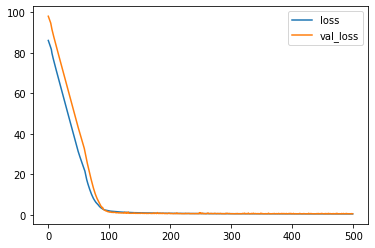

In [197]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(np.arange(len(loss)), loss, label='loss')
plt.plot(np.arange(len(loss)), val_loss, label='val_loss')
plt.legend()
plt.show()

## load final model weights

In [ ]:
model.load_weights('/content/drive/MyDrive/NN_assignment4/model_weights_500epochs.h5')

## test model by predict the next value on test set
1. predict the next 1 2 3 4 datapoints from Jan 1 1980 through the present day;
 as we can see from the following result, we can know that the prediction result is all less then 120, that is reasonable, because the train_data is all less then 120 and the most of the test_data is larger then 120

In [198]:
data_test_x_rnn = []
data_test_x_wave = []
data_test_y = []

for i in range(Tx, len(sp_test)):
    data_test_x_rnn.append(sp_test[i-Tx+4:i])
    data_test_y.append(sp_test[i])
    temp_wave = []
    for j in range(i-Tx+5, i+1):
        temp_wave.append(sp_test[j-5:j])
    data_test_x_wave.append(temp_wave)

In [199]:
data_test_x_rnn_arr = np.expand_dims(np.array(data_test_x_rnn), -1)
data_test_x_wave_arr = np.expand_dims(np.array(data_test_x_wave), -1)
data_test_y_arr = np.array(data_test_y)

In [200]:
data_test_x_rnn_arr.shape, data_test_x_wave_arr.shape, data_test_y_arr.shape

((10280, 56, 1), (10280, 56, 5, 1), (10280,))

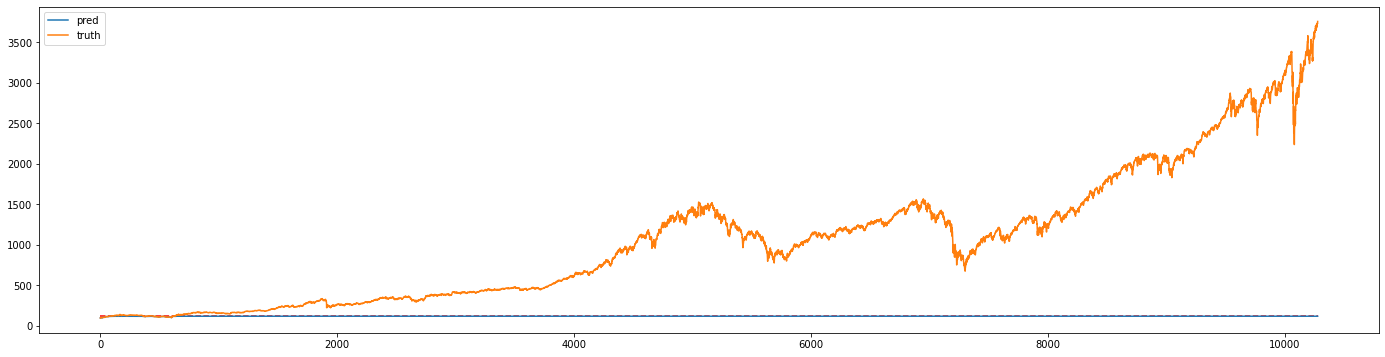

In [204]:
# pred the next value
y_pred = model.predict([data_test_x_rnn_arr, data_test_x_wave_arr])
figure = plt.figure(figsize=(24, 6))
plt.plot(np.arange(len(y_pred)), y_pred, label='pred')
plt.plot(np.arange(len(y_pred)), data_test_y_arr, label='truth')
plt.hlines(120, 0, len(y_pred), 'r', 'dashed')
plt.legend()
plt.show()

In [202]:
max(y_pred)

array([119.75696], dtype=float32)

# Optimized: retrain the model by normalizing the data in the sliding window
however the input and opt are all very small, which may not be a good idea

In [234]:
data_x_rnn = []
data_x_wave = []
data_y_normalized = []
data_y = []
means = []
stds = []


for i in range(Tx, len(sp_train)):
    temp_arr = np.array(sp_train[i-Tx+4:i])

    # normilzing the sp input
    mean = np.mean(temp_arr)
    std = np.std(temp_arr)

    means.append(mean)
    stds.append(std)

    temp_arr -= mean
    temp_arr /= std

    data_x_rnn.append(temp_arr)
    data_y_normalized.append((sp_train[i]-mean)/std)
    data_y.append(sp_train[i])
    temp_wave = []
    
    for j in range(i-Tx+5, i+1):
        temp_wave.append(sp_train[j-5:j])
    data_x_wave.append(temp_wave)


data_x_rnn_arr = np.expand_dims(np.array(data_x_rnn), -1)
data_x_wave_arr = np.expand_dims(np.array(data_x_wave), -1)
data_y_normalized_arr = np.array(data_y_normalized)

data_x_rnn_arr.shape, data_x_wave_arr.shape, data_y_normalized_arr.shape

((4955, 56, 1), (4955, 56, 5, 1), (4955,))

In [235]:
rnn_ipt = Input(shape=(Tx-4, 1))

wave_detect_ipt = Input(shape=(Tx-4, 5, 1))
wave_detect_opt = TimeDistributed(wave_detect_model_new)(wave_detect_ipt)

concat_opt = Concatenate(axis=-1)([rnn_ipt, wave_detect_opt])

lstm_opt = LSTM(8, return_sequences=False)(concat_opt)

opt = Dense(1)(lstm_opt)

model_normalized = Model([rnn_ipt, wave_detect_ipt], opt)

model_normalized.compile(loss='mae', optimizer='adam')

wave_detect_model_new.trainable=False

In [236]:
history = model_normalized.fit([data_x_rnn_arr, data_x_wave_arr], data_y_normalized_arr, batch_size=16, epochs=300, verbose=1, validation_split=0.1)

Epoch 1/300
279/279 [==============================] - 3s 6ms/step - loss: 0.8525 - val_loss: 0.3830
Epoch 2/300
279/279 [==============================] - 1s 4ms/step - loss: 0.3316 - val_loss: 0.2901
Epoch 3/300
279/279 [==============================] - 1s 4ms/step - loss: 0.2661 - val_loss: 0.2673
Epoch 4/300
279/279 [==============================] - 1s 4ms/step - loss: 0.2556 - val_loss: 0.2598
Epoch 5/300
279/279 [==============================] - 1s 4ms/step - loss: 0.2454 - val_loss: 0.2565
Epoch 6/300
279/279 [==============================] - 1s 4ms/step - loss: 0.2432 - val_loss: 0.2541
Epoch 7/300
279/279 [==============================] - 1s 4ms/step - loss: 0.2474 - val_loss: 0.2533
Epoch 8/300
279/279 [==============================] - 1s 4ms/step - loss: 0.2402 - val_loss: 0.2526
Epoch 9/300
279/279 [==============================] - 1s 4ms/step - loss: 0.2441 - val_loss: 0.2520
Epoch 10/300
279/279 [==============================] - 1s 4ms/step - loss: 0.2411 - val_lo

In [237]:
model_normalized.save_weights('/content/drive/MyDrive/NN_assignment4/model_normalized_weights_300epochs.h5')

In [238]:
history2 = model_normalized.fit([data_x_rnn_arr, data_x_wave_arr], data_y_normalized_arr, batch_size=8, epochs=100, verbose=1, validation_split=0.1)

Epoch 1/100
558/558 [==============================] - 3s 5ms/step - loss: 0.2342 - val_loss: 0.2547
Epoch 2/100
558/558 [==============================] - 2s 4ms/step - loss: 0.2343 - val_loss: 0.2557
Epoch 3/100
558/558 [==============================] - 2s 4ms/step - loss: 0.2341 - val_loss: 0.2533
Epoch 4/100
558/558 [==============================] - 2s 4ms/step - loss: 0.2339 - val_loss: 0.2536
Epoch 5/100
558/558 [==============================] - 2s 4ms/step - loss: 0.2343 - val_loss: 0.2558
Epoch 6/100
558/558 [==============================] - 2s 4ms/step - loss: 0.2344 - val_loss: 0.2535
Epoch 7/100
558/558 [==============================] - 2s 4ms/step - loss: 0.2339 - val_loss: 0.2554
Epoch 8/100
558/558 [==============================] - 2s 4ms/step - loss: 0.2335 - val_loss: 0.2539
Epoch 9/100
558/558 [==============================] - 2s 4ms/step - loss: 0.2339 - val_loss: 0.2537
Epoch 10/100
558/558 [==============================] - 2s 4ms/step - loss: 0.2347 - val_lo

In [239]:
model_normalized.save_weights('/content/drive/MyDrive/NN_assignment4/model_normalized_weights_400epochs.h5')

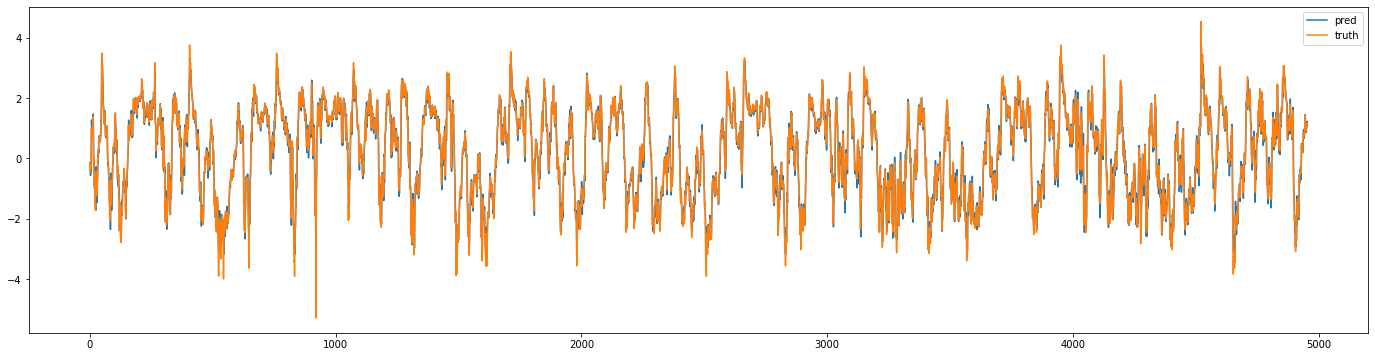

In [240]:
# pred the next value
y_pred = model_normalized.predict([data_x_rnn_arr, data_x_wave_arr])
figure = plt.figure(figsize=(24, 6))
plt.plot(np.arange(len(y_pred)), y_pred, label='pred')
plt.plot(np.arange(len(y_pred)), data_y_normalized_arr, label='truth')
plt.legend()
plt.show()

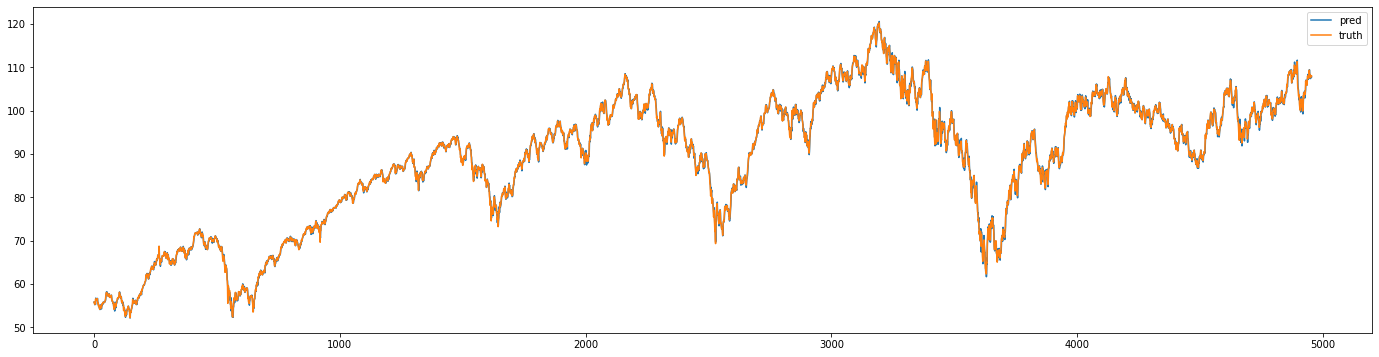

In [241]:
y_pred = model_normalized.predict([data_x_rnn_arr, data_x_wave_arr])
figure = plt.figure(figsize=(24, 6))
plt.plot(np.arange(len(y_pred)), (y_pred*np.array(stds).reshape(-1, 1) + np.array(means).reshape(-1, 1)), label='pred')

plt.plot(np.arange(len(y_pred)), data_y, label='truth')
plt.legend()
plt.show()

In [242]:
data_test_x_rnn = []
data_test_x_wave = []
data_test_y_normalized = []
data_test_y = []
means_test = []
stds_test = []


for i in range(Tx, len(sp_test)):
    temp_arr = np.array(sp_test[i-Tx+4:i])

    # normilzing the sp input
    mean = np.mean(temp_arr)
    std = np.std(temp_arr)

    means_test.append(mean)
    stds_test.append(std)

    temp_arr -= mean
    temp_arr /= std

    data_test_x_rnn.append(temp_arr)
    data_test_y_normalized.append((sp_test[i]-mean)/std)
    data_test_y.append(sp_test[i])
    temp_wave = []
    for j in range(i-Tx+5, i+1):
        temp_wave.append(sp_test[j-5:j])
    data_test_x_wave.append(temp_wave)


data_test_x_rnn_arr = np.expand_dims(np.array(data_test_x_rnn), -1)
data_test_x_wave_arr = np.expand_dims(np.array(data_test_x_wave), -1)
data_test_y_normalized_arr = np.array(data_test_y_normalized)

data_test_x_rnn_arr.shape, data_test_x_wave_arr.shape, data_test_y_normalized_arr.shape

((10280, 56, 1), (10280, 56, 5, 1), (10280,))

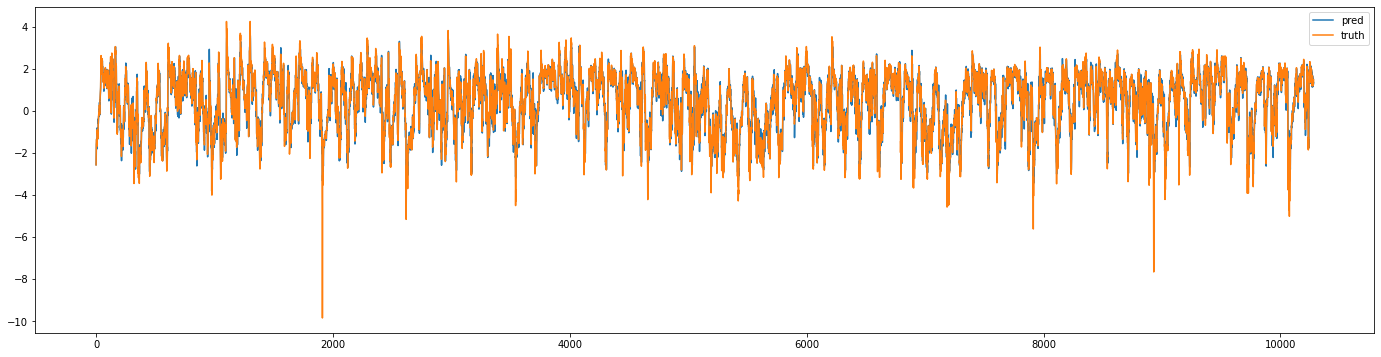

In [243]:
# pred the next value
y_pred = model_normalized.predict([data_test_x_rnn_arr, data_test_x_wave_arr])
figure = plt.figure(figsize=(24, 6))
plt.plot(np.arange(len(y_pred)), y_pred, label='pred')
plt.plot(np.arange(len(y_pred)), data_test_y_normalized_arr, label='truth')
plt.legend()
plt.show()

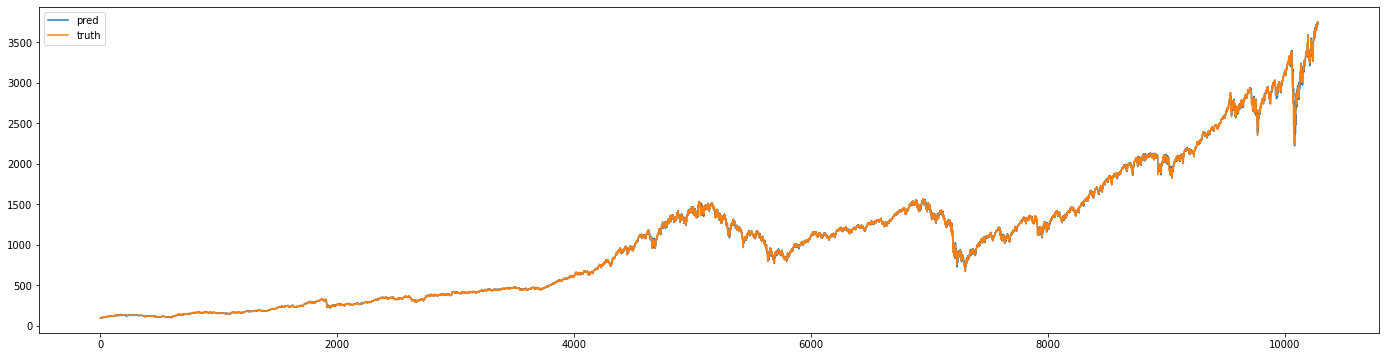

In [244]:
y_pred = model_normalized.predict([data_test_x_rnn_arr, data_test_x_wave_arr])
figure = plt.figure(figsize=(24, 6))
plt.plot(np.arange(len(y_pred)), (y_pred*np.array(stds_test).reshape(-1, 1) + np.array(means_test).reshape(-1, 1)), label='pred')

plt.plot(np.arange(len(y_pred)), data_test_y, label='truth')
plt.legend()
plt.show()

## next 2,3,4 prediction

(10279, 56, 1) (10279, 56, 5, 1) (10279,)


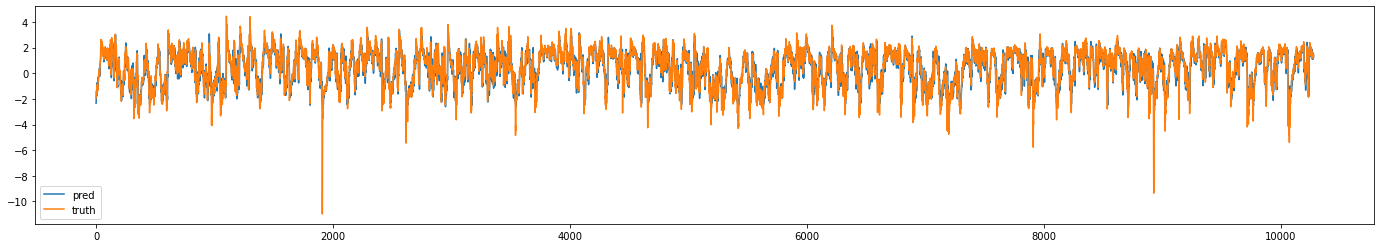

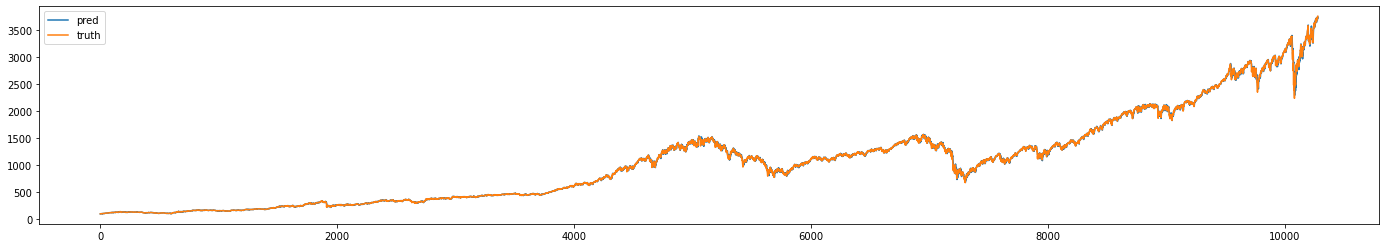

In [262]:
y_pred_first_remap = (y_pred*np.array(stds_test).reshape(-1, 1) + np.array(means_test).reshape(-1, 1))
data_test_sec_x_rnn = []
data_test_sec_x_wave = []
data_test_sec_y_normalized = []
data_test_sec_y = []
means_test_sec = []
stds_test_sec = []

# we are predicting the next second value, so length is 
for i in range(Tx, len(sp_test)-1):
    temp_arr = np.concatenate([np.array(sp_test[i-Tx+1:i]), y_pred_first_remap[i-Tx]], axis=-1)

    # normilzing the sp input
    mean = np.mean(temp_arr[4:])
    std = np.std(temp_arr[4:])

    means_test_sec.append(mean)
    stds_test_sec.append(std)

    temp_arr -= mean
    temp_arr /= std

    data_test_sec_x_rnn.append(temp_arr[4:])
    data_test_sec_y_normalized.append((sp_test[i+1]-mean)/std)
    data_test_sec_y.append(sp_test[i+1])

    # make wave input
    temp_wave = []
    for j in range(5, Tx+1):
        temp_wave.append(temp_arr[j-5:j])
    data_test_sec_x_wave.append(temp_wave)


data_test_sec_x_rnn_arr = np.expand_dims(np.array(data_test_sec_x_rnn), -1)
data_test_sec_x_wave_arr = np.expand_dims(np.array(data_test_sec_x_wave), -1)
data_test_sec_y_normalized_arr = np.array(data_test_sec_y_normalized)

print(data_test_sec_x_rnn_arr.shape, data_test_sec_x_wave_arr.shape, data_test_sec_y_normalized_arr.shape)



y_pred_sec = model_normalized.predict([data_test_sec_x_rnn_arr, data_test_sec_x_wave_arr])
# pred the second value
figure = plt.figure(figsize=(24, 4))
plt.plot(np.arange(len(y_pred_sec)), y_pred_sec, label='pred')
plt.plot(np.arange(len(y_pred_sec)), data_test_sec_y_normalized_arr, label='truth')
plt.legend()
plt.show()

figure = plt.figure(figsize=(24, 4))
y_pred_sec_remap = (y_pred_sec*np.array(stds_test_sec).reshape(-1, 1) + np.array(means_test_sec).reshape(-1, 1))
plt.plot(np.arange(len(y_pred_sec_remap)), y_pred_sec_remap, label='pred')
plt.plot(np.arange(len(data_test_sec_y)), data_test_sec_y, label='truth')
plt.legend()
plt.show()

(10278, 56, 1) (10278, 56, 5, 1) (10278,)


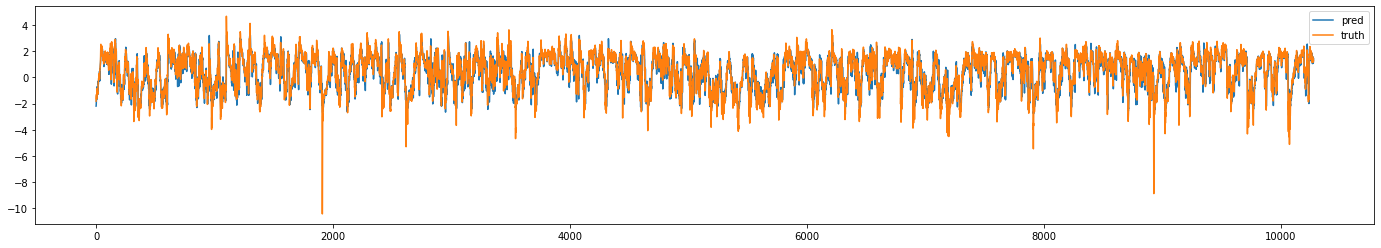

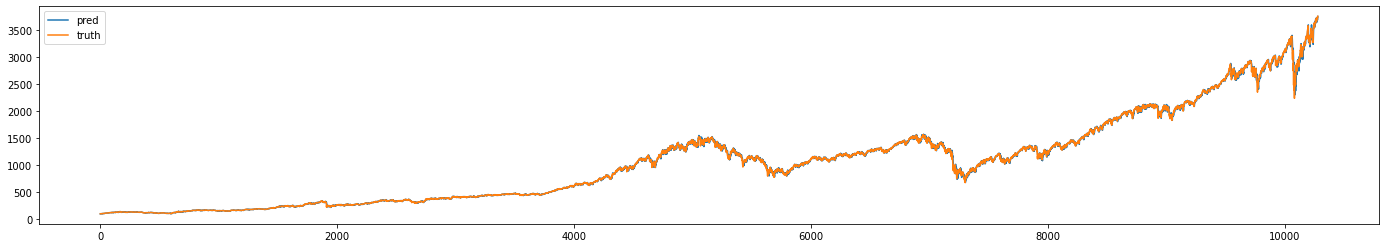

In [263]:
data_test_third_x_rnn = []
data_test_third_x_wave = []
data_test_third_y_normalized = []
data_test_third_y = []
means_test_third = []
stds_test_third = []

for i in range(Tx, len(sp_test)-2):
    temp_arr = np.concatenate([np.array(sp_test[i-Tx+2:i]), y_pred_first_remap[i-Tx],  y_pred_sec_remap[i-Tx]], axis=-1)

    # normilzing the sp input
    mean = np.mean(temp_arr[4:])
    std = np.std(temp_arr[4:])

    means_test_third.append(mean)
    stds_test_third.append(std)

    temp_arr -= mean
    temp_arr /= std

    data_test_third_x_rnn.append(temp_arr[4:])
    data_test_third_y_normalized.append((sp_test[i+1]-mean)/std)
    data_test_third_y.append(sp_test[i+2])

    # make wave input
    temp_wave = []
    for j in range(5, Tx+1):
        temp_wave.append(temp_arr[j-5:j])
    data_test_third_x_wave.append(temp_wave)


data_test_third_x_rnn_arr = np.expand_dims(np.array(data_test_third_x_rnn), -1)
data_test_third_x_wave_arr = np.expand_dims(np.array(data_test_third_x_wave), -1)
data_test_third_y_normalized_arr = np.array(data_test_third_y_normalized)

print(data_test_third_x_rnn_arr.shape, data_test_third_x_wave_arr.shape, data_test_third_y_normalized_arr.shape)



y_pred_third = model_normalized.predict([data_test_third_x_rnn_arr, data_test_third_x_wave_arr])
# pred the thirdond value
figure = plt.figure(figsize=(24, 4))
plt.plot(np.arange(len(y_pred_third)), y_pred_third, label='pred')
plt.plot(np.arange(len(y_pred_third)), data_test_third_y_normalized_arr, label='truth')
plt.legend()
plt.show()

figure = plt.figure(figsize=(24, 4))
y_pred_third_remap = (y_pred_third*np.array(stds_test_third).reshape(-1, 1) + np.array(means_test_third).reshape(-1, 1))
plt.plot(np.arange(len(y_pred_third_remap)), y_pred_third_remap, label='pred')
plt.plot(np.arange(len(data_test_third_y)), data_test_third_y, label='truth')
plt.legend()
plt.show()

(10277, 56, 1) (10277, 56, 5, 1) (10277,)


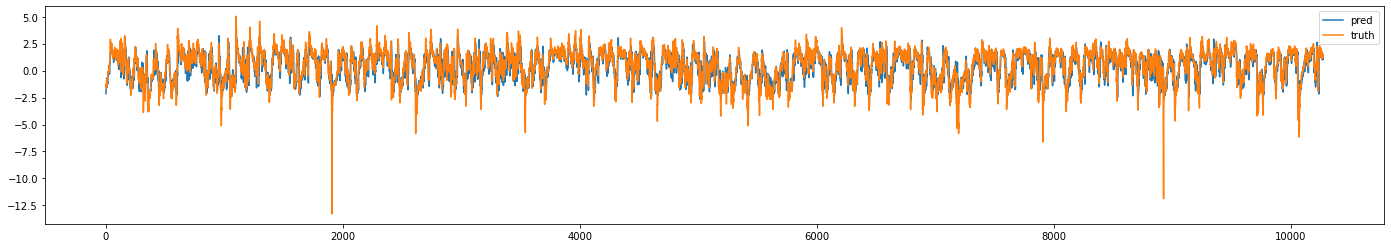

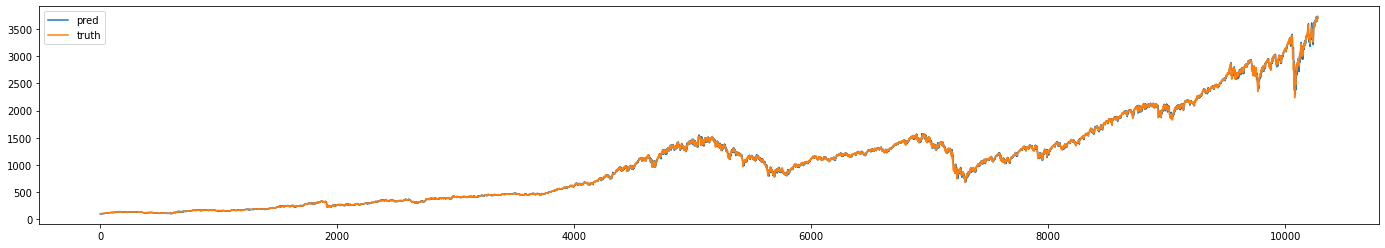

In [264]:

data_test_fourth_x_rnn = []
data_test_fourth_x_wave = []
data_test_fourth_y_normalized = []
data_test_fourth_y = []
means_test_fourth = []
stds_test_fourth = []

for i in range(Tx, len(sp_test)-3):
    temp_arr = np.concatenate([np.array(sp_test[i-Tx+3:i]), y_pred_first_remap[i-Tx],  y_pred_sec_remap[i-Tx], y_pred_third_remap[i-Tx]], axis=-1)

    # normilzing the sp input
    mean = np.mean(temp_arr[4:])
    std = np.std(temp_arr[4:])

    means_test_fourth.append(mean)
    stds_test_fourth.append(std)

    temp_arr -= mean
    temp_arr /= std

    data_test_fourth_x_rnn.append(temp_arr[4:])
    data_test_fourth_y_normalized.append((sp_test[i+3]-mean)/std)
    data_test_fourth_y.append(sp_test[i+1])

    # make wave input
    temp_wave = []
    for j in range(5, Tx+1):
        temp_wave.append(temp_arr[j-5:j])
    data_test_fourth_x_wave.append(temp_wave)


data_test_fourth_x_rnn_arr = np.expand_dims(np.array(data_test_fourth_x_rnn), -1)
data_test_fourth_x_wave_arr = np.expand_dims(np.array(data_test_fourth_x_wave), -1)
data_test_fourth_y_normalized_arr = np.array(data_test_fourth_y_normalized)

print(data_test_fourth_x_rnn_arr.shape, data_test_fourth_x_wave_arr.shape, data_test_fourth_y_normalized_arr.shape)



y_pred_fourth = model_normalized.predict([data_test_fourth_x_rnn_arr, data_test_fourth_x_wave_arr])
# pred the fourthond value
figure = plt.figure(figsize=(24, 4))
plt.plot(np.arange(len(y_pred_fourth)), y_pred_fourth, label='pred')
plt.plot(np.arange(len(y_pred_fourth)), data_test_fourth_y_normalized_arr, label='truth')
plt.legend()
plt.show()

y_pred_fourth_remap = (y_pred_fourth*np.array(stds_test_fourth).reshape(-1, 1) + np.array(means_test_fourth).reshape(-1, 1))
figure = plt.figure(figsize=(24, 4))
plt.plot(np.arange(len(y_pred_fourth_remap)), y_pred_fourth_remap, label='pred')
plt.plot(np.arange(len(data_test_fourth_y)), data_test_fourth_y, label='truth')
plt.legend()
plt.show()

## error rate prediction


In [265]:
err1 = []
err2 = []
err3 = []
err4 = []

for i in range(len(y_pred_first_remap)):
    err1.append(abs(y_pred_first_remap[i] - data_test_y[i])/ data_test_y[i])

for i in range(len(y_pred_sec_remap)):
    err2.append(abs(y_pred_sec_remap[i] - data_test_sec_y[i])/ data_test_sec_y[i])

for i in range(len(y_pred_third_remap)):
    err3.append(abs(y_pred_third_remap[i] - data_test_third_y[i])/ data_test_third_y[i])

for i in range(len(y_pred_fourth_remap)):
    err4.append(abs(y_pred_fourth_remap[i] - data_test_fourth_y[i])/ data_test_fourth_y[i])  

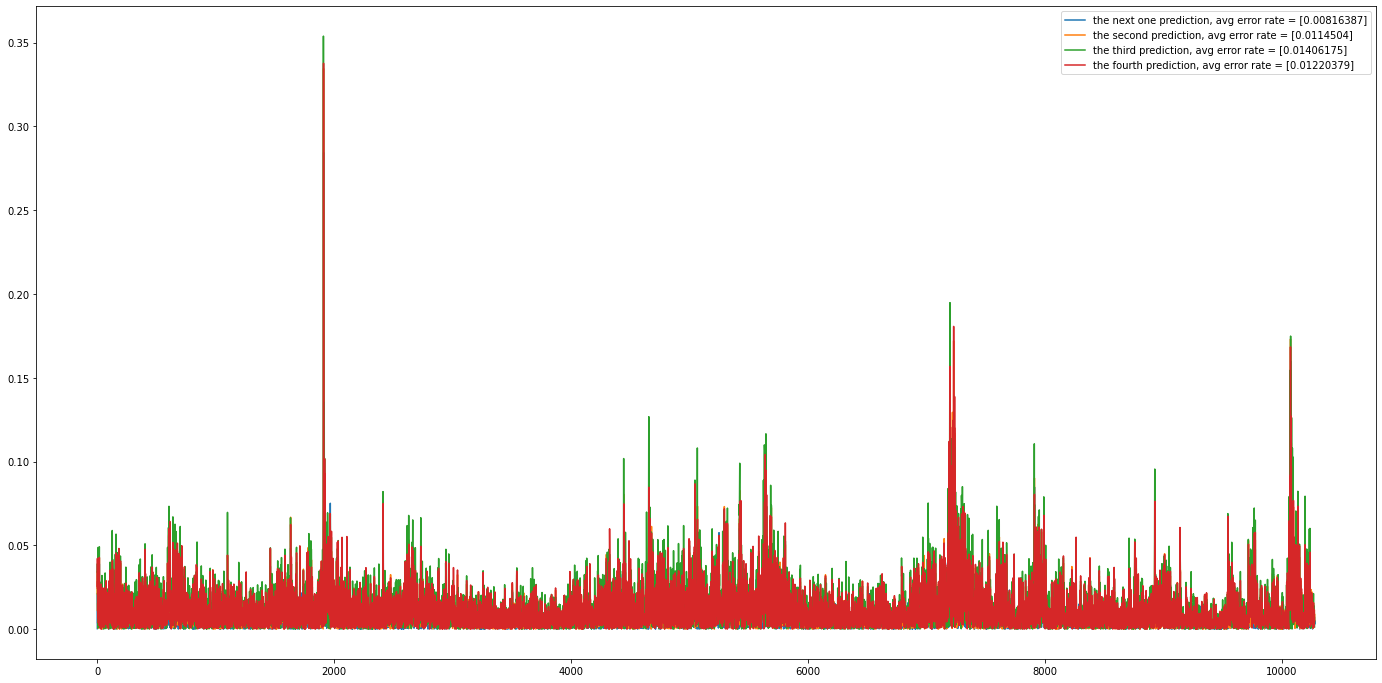

In [266]:
figure = plt.figure(figsize=(24, 12))
plt.plot(np.arange(len(err1)), err1, label=f'the next one prediction, avg error rate = {sum(err1) / len(err1)}')
plt.plot(np.arange(len(err2)), err2, label=f'the second prediction, avg error rate = {sum(err2) / len(err2)}')
plt.plot(np.arange(len(err3)), err3, label=f'the third prediction, avg error rate = {sum(err3) / len(err3)}')
plt.plot(np.arange(len(err4)), err4, label=f'the fourth prediction, avg error rate = {sum(err4) / len(err4)}')
plt.legend()
plt.show()

# Enhance the algo's functionality
generate a sell signal while the current time step is about to come to a peak<br>
we just use the next predicted value. 

performance is not good, the reason is my model can not predict the 'huge vibration', and the predicted value tends to be equal to the last day's value. Which is not a good phenomenon.

In [267]:
y_truth = data_test_y

In [282]:
sell_signal = [0] * len(y_truth)

for i in range(len(y_pred_fourth_remap)):
    if (y_truth[i] - y_pred_fourth_remap[i]) / y_truth[i] > 0.03:
        sell_signal[i] = 1


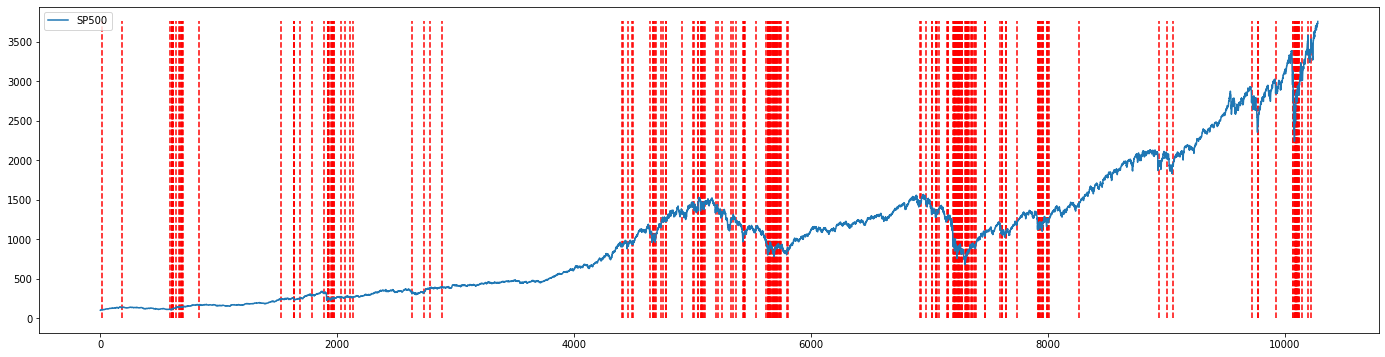

In [283]:
plt.figure(figsize=(24, 6))

plt.plot(np.arange(len(y_truth)), y_truth, label='SP500')
ymax = max(y_truth)
for i, s in enumerate(sell_signal):
    if s == 1:
        plt.vlines(i, 0, ymax, colors='r', linestyles='dashed')

plt.legend()
plt.show()

# Price uncertainty:
1. add noise to sp500 value
2. Noise will be Gaussian-distributed with 10 percent cross-section and zero mean.
3. assuming that the source dataset (from 1, above) has normalized value range equal to the real-valued interval [0,1].  You can scale this accordingly 

the dev of the noise we need to add is related to the dev of series in the current slide_window

## add noise to test dataset

In [286]:
noise_std = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]
noise_sp_arr = []

In [287]:
data_test_x_rnn_arr.shape

(10280, 56, 1)

In [290]:
# in my experiment, the time series length is 10, so there is only one noise added to sp series.
for n_std in noise_std:
    new_sp_arr = []
    for i in range(len(data_test_x_rnn_arr)):
        sp_arr = data_test_x_rnn_arr[i].copy()
        indices = np.random.randint(Tx-4, size=int(Tx/10))
        for idx in indices:
            noise = np.random.normal(scale=n_std)
            sp_arr[idx, 0] += noise
        new_sp_arr.append(sp_arr)
    noise_sp_arr.append(np.array(new_sp_arr))



In [292]:
len(noise_sp_arr), noise_sp_arr[-1].shape

(9, (10280, 56, 1))

## test predicting the next value with noise added


In [310]:
y_pred_noise = []
for sp_arr in noise_sp_arr:
    y_pred = model_normalized.predict([sp_arr, data_test_x_wave_arr])
    y_pred_noise.append((y_pred*np.array(stds_test).reshape(-1, 1) + np.array(means_test).reshape(-1, 1)).reshape(-1, ))

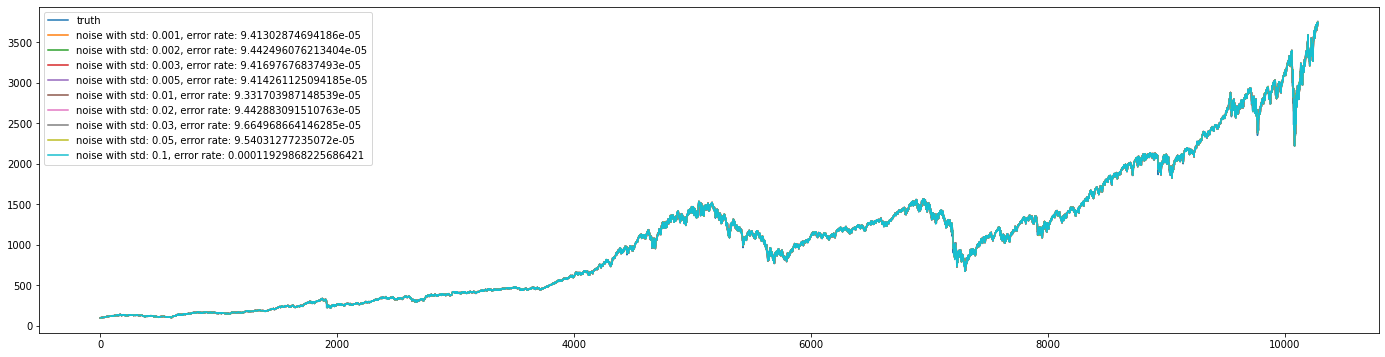

In [312]:
figure = plt.figure(figsize=(24, 6))
y_truth = np.array(data_test_y)

plt.plot(np.arange(len(y_truth)), y_truth, label='truth')
for i, pred in enumerate(y_pred_noise):
    plt.plot(np.arange(len(pred)), pred, label=f'noise with std: {noise_std[i]}, error rate: {np.mean((pred - y_truth)/y_truth)}')

plt.legend()
plt.show()